# 0. Goals

Before diving into your analysis, it’s crucial to have clear our starting questions and objectives.

* **Correlation and Influence**: How do the Civil Liberties Index, Social Rights and Equality Index and Access to Justice Index correlate with each other?

  We'll study the relationships and interactions between the three subattributes.

* **Impact on Democracy**: Which of these subattributes has the most significant impact on the overall Fundamental rights Index?
  
  We'll try to understand how each subattribute contributes to the overall Democracy Index.

* **Temporal Trends**: How have these indices changed over time in different regions/countries?

  We'll plot and analyze the trends of each indicator over time for some country and region.

* **Predictions**: Can we predict future values of these indices based on current trends and past data?

  We'll use models to predict future trends and values for the subattributes.

* **Comparative Analysis**: How do these indices differ across countries with varying levels of democracy?

  We'll compare the indicators across countries and over time to identify patterns and relationships.

# 1. Data definition

Where data came from?

* **International Institute for Democracy and Electoral Assistance** (IDEA).

What is IDEA?

*  The International IDEA is an intergovernmental organization that supports democracy worldwide.

In which data are we focused?

*  International IDEA launched the **Global State of Democracy** (GSoD) Initiative in 2016. This Initiative provides evidence-based, **balanced analysis and data on the state and quality of democracy** for 173 countries across the world. It aims to contribute to the public debate on democracy and inform policy interventions to strengthen democracy. The Initiative’s primary knowledge products are the Democracy Tracker, the GSoD Indices, and the GSoD Reports.

Which data will we use?

*  There are four indices that we will use: Fundamental Rights Index, Access to justice Index, Civil liberties Index, Social rights and equality Index. The last 3 indices are subattribute and they, aggregated, constitute the first index.

## Fundamental Rights Index (IDEA)

Fundamental Rights captures the degree to which civil liberties are respected, and whether people have access to basic resources that enable their active participation in the political process. This aspect overlaps significantly with the international covenants on civil and political, and economic, social and cultural rights. It includes three subattributes: Access to Justice, Civil Liberties, and Social Rights and Equality This attribute is composed of three subattributes: access to justice, civil liberties, and social rights and equality. The three subattributes were aggregated into the Fundamental Rights index using BFA.

## Access to justice Index (IDEA)

The access to justice subattribute denotes the extent to which the legal system is fair (i.e., citizens are not subject to arbitrary arrest or detention and have the right to be under the jurisdiction of, and to seek redress from, competent, independent and impartial tribunals without undue delay). It comprises four expert coded variables (V-Dem) that go beyond the independence of courts and an in-house coded CLD measure of the right to a fair trial. The five indicators  ( i.e access to justice for men,access to justice for women,judicial corruption decision, judicial accountability and fair trial) were aggregated into the access to justice subattribute using BFA.

## Civil liberties Index (IDEA)

The civil liberties subattribute denotes the extent to which civil rights and liberties are respected. The five civil liberties sub-components are freedom of expression, freedom of association and assembly, freedom of religion, freedom of movement, and personal integrity and security, each of which reflects core concepts in the human rights literature. The five sub-components were aggregated into the civil liberties subattribute using BFA.

## Social rights and equality Index (IDEA)

The social rights and equality subattribute denotes the extent to which basic welfare (i.e. social security, health care and education) and political and social equality between social groups and genders are realized. The three social rights and equality sub-components are social group equality, basic welfare and gender equality, each of which reflects core concepts in the human rights literature.The three sub-components were aggregated into the social rights and equality subattribute using BFA.


# 2 Data preprocessing

In [1]:
# Importing necesary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mno

In [2]:
# Importing and showing our data
df_civil_liberties_index = pd.read_csv('civil_liberties_index.csv')
df_social_rights_equality_index = pd.read_csv('social_rights_equality_index.csv')
df_access_to_justice_index = pd.read_csv('access_to_justice_index.csv')
df_fundamental_rights_index = pd.read_csv('fundamental_rights_index.csv')

df_civil_liberties_index

,country,1975,1976,1977,1978,1979,1980,1981,1982,1983,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,39.50,39.80,39.30,27.60,22.8,23.30,26.60,25.20,25.90,...,56.6,55.5,55.5,55.0,53.6,55.3,57.3,52.3,56.0,33.5
1,Angola,24.30,27.00,25.10,25.30,25.6,27.40,27.50,27.30,28.30,...,50.7,49.1,49.2,49.4,50.9,51.2,56.3,56.4,56.9,53.3
2,Albania,7.03,7.28,7.67,7.66,7.5,7.83,7.58,7.43,7.95,...,72.0,73.8,74.0,73.8,73.7,73.6,73.4,73.1,69.7,70.2
3,UAE,38.90,40.00,41.30,41.20,41.2,40.40,40.00,40.30,38.70,...,39.2,38.9,38.8,38.9,39.0,38.3,38.1,37.4,37.1,36.4
4,Argentina,51.90,35.70,29.00,29.00,29.3,29.30,32.10,35.20,49.10,...,79.3,80.0,78.9,77.6,79.0,76.1,76.5,76.0,80.3,76.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Vanuatu,NaN,NaN,NaN,NaN,NaN,73.00,74.30,74.20,73.60,...,79.1,79.1,79.3,79.3,79.0,81.7,81.6,80.5,77.9,81.3
168,Yemen,39.10,39.20,39.30,36.50,35.9,37.20,37.10,37.10,35.30,...,53.0,46.9,44.4,34.4,32.9,30.3,29.0,30.7,29.9,31.6
169,South Africa,33.70,33.70,33.90,34.00,33.8,33.90,33.50,34.10,34.00,...,73.1,73.0,73.1,72.3,70.0,70.8,72.8,71.1,72.1,73.7
170,Zambia,48.00,48.20,48.00,48.30,48.1,48.10,48.40,48.60,48.70,...,65.0,63.2,63.8,63.1,60.0,59.7,56.5,58.3,53.5,58.3


In [3]:
df_civil_liberties_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 48 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  172 non-null    object 
 1   1975     144 non-null    float64
 2   1976     144 non-null    float64
 3   1977     145 non-null    float64
 4   1978     146 non-null    float64
 5   1979     146 non-null    float64
 6   1980     147 non-null    float64
 7   1981     147 non-null    float64
 8   1982     147 non-null    float64
 9   1983     147 non-null    float64
 10  1984     147 non-null    float64
 11  1985     147 non-null    float64
 12  1986     147 non-null    float64
 13  1987     147 non-null    float64
 14  1988     148 non-null    float64
 15  1989     148 non-null    float64
 16  1990     149 non-null    float64
 17  1991     166 non-null    float64
 18  1992     167 non-null    float64
 19  1993     169 non-null    float64
 20  1994     169 non-null    float64
 21  1995     169 non

In [4]:
# Reshaping DataFrames

# Here we are transforming the structure of the original DataFrames.
# These DataFrames has data in a format where each year's data is in a
# separate column. The melt function converts them into a "long" format.

df_civil_liberties_index_long = df_civil_liberties_index.melt(
    id_vars=['country'],
    var_name='year',
    value_name='civil_liberties')

df_social_rights_equality_index_long = df_social_rights_equality_index.melt(
    id_vars=['country'],
    var_name='year',
    value_name='social_rights_equality')

df_access_to_justice_index_long = df_access_to_justice_index.melt(
    id_vars=['country'],
    var_name='year',
    value_name='access_to_justice')

df_fundamental_rights_index_long = df_fundamental_rights_index.melt(
    id_vars=['country'],
    var_name='year',
    value_name='fundamental_rights')

# Merging DataFrames
merged_df = pd.merge(
    df_civil_liberties_index_long,
    df_social_rights_equality_index_long,
    on=['country', 'year'])

merged_df = pd.merge(
    merged_df,
    df_access_to_justice_index_long,
    on=['country', 'year'])

merged_df = pd.merge(
    merged_df,
    df_fundamental_rights_index_long,
    on=['country', 'year'])

merged_df

,country,year,civil_liberties,social_rights_equality,access_to_justice,fundamental_rights
0,Afghanistan,1975,39.50,19.20,38.8,36.1
1,Angola,1975,24.30,6.58,26.1,22.4
2,Albania,1975,7.03,43.30,16.0,17.3
3,UAE,1975,38.90,18.50,47.5,42.0
4,Argentina,1975,51.90,48.70,48.6,49.4
...,...,...,...,...,...,...
8079,Vanuatu,2021,81.30,47.10,67.8,68.0
8080,Yemen,2021,31.60,6.14,28.1,25.3
8081,South Africa,2021,73.70,47.90,72.7,70.3
8082,Zambia,2021,58.30,37.40,50.2,50.1


In [5]:
# Quick overview of the numerical data in our DataFrame
merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
civil_liberties,7627.0,59.564034,20.411471,0.0,44.3,59.4,76.0,100.0
social_rights_equality,7627.0,44.325746,19.430458,0.0,30.3,40.8,58.2,100.0
access_to_justice,7597.0,56.718959,18.576107,0.0,42.1,55.8,69.6,100.0
fundamental_rights,7597.0,55.855734,18.775502,0.0,41.5,54.3,68.8,100.0


## 2.1 Missing Values

In [6]:
# Concise summary of the DataFrame
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8084 entries, 0 to 8083
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 8084 non-null   object 
 1   year                    8084 non-null   object 
 2   civil_liberties         7627 non-null   float64
 3   social_rights_equality  7627 non-null   float64
 4   access_to_justice       7597 non-null   float64
 5   fundamental_rights      7597 non-null   float64
dtypes: float64(4), object(2)
memory usage: 379.1+ KB


In [7]:
# Checking for missing values
merged_df.isnull().sum()

,0
country,0
year,0
civil_liberties,457
social_rights_equality,457
access_to_justice,487
fundamental_rights,487


<Axes: >

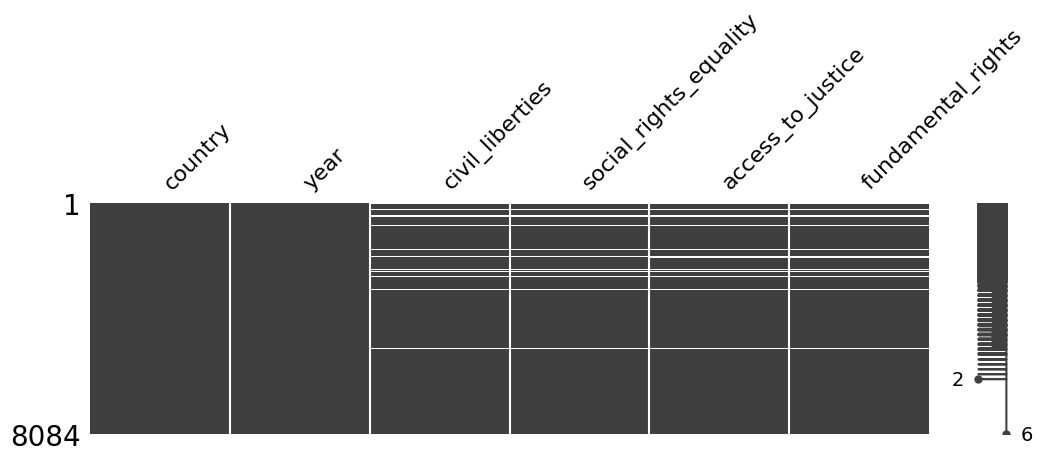

In [8]:
# Visualizing missing data
mno.matrix(merged_df, figsize = (12, 3))

In [9]:
# Find rows with null values until 1990 and non-null values in 1991 (ex URSS)
rows_to_update = df_fundamental_rights_index[(df_fundamental_rights_index['1990'].isnull()) & (df_fundamental_rights_index['1991'].notnull())]

rows_to_update['country'].unique()

array(['Armenia', 'Azerbaijan', 'Belarus', 'Estonia', 'Georgia',
       'Croatia', 'Kazakhstan', 'Kyrgyz Republic', 'Lithuania', 'Latvia',
       'Moldova', 'North Macedonia', 'Slovenia', 'Tajikistan',
       'Turkmenistan', 'Ukraine', 'Uzbekistan'], dtype=object)

In [10]:
# Copy values from Russia (1975 to 1990) to these rows
russia_values_civil_liberties = df_civil_liberties_index[df_civil_liberties_index['country'] == 'Russia'].iloc[0, 1:17]
russia_values_social_rights_equality = df_social_rights_equality_index[df_social_rights_equality_index['country'] == 'Russia'].iloc[0, 1:17]
russia_values_access_to_justice = df_access_to_justice_index[df_access_to_justice_index['country'] == 'Russia'].iloc[0, 1:17]
russia_values_fundamental_rights = df_fundamental_rights_index[df_fundamental_rights_index['country'] == 'Russia'].iloc[0, 1:17]

# 1:17 to include 1975 to 1990
# Update the DataFrame
for index in rows_to_update.index:
  df_civil_liberties_index.loc[index, '1975':'1990'] = russia_values_civil_liberties.values
  df_social_rights_equality_index.loc[index, '1975':'1990'] = russia_values_social_rights_equality.values
  df_access_to_justice_index.loc[index, '1975':'1990'] = russia_values_access_to_justice.values
  df_fundamental_rights_index.loc[index, '1975':'1990'] = russia_values_fundamental_rights.values

In [11]:
# Identify rows with null values
rows_with_nulls = df_civil_liberties_index[df_civil_liberties_index.isnull().any(axis=1)]
rows_with_nulls['country'].unique()

array(['Bosnia and Herzegovina', 'Djibouti', 'Eritrea', 'Montenegro',
       'Namibia', 'Palestine', 'Solomon Islands', 'South Sudan',
       'Slovak Republic', 'Timor-Leste', 'Vanuatu'], dtype=object)

In [12]:
# Identify rows with null values
rows_with_nulls = df_fundamental_rights_index[df_fundamental_rights_index.isnull().any(axis=1)]
rows_with_nulls['country'].unique()

array(['Bahrain', 'Bosnia and Herzegovina', 'Djibouti', 'Eritrea',
       'Montenegro', 'Namibia', 'Palestine', 'Solomon Islands',
       'South Sudan', 'Slovak Republic', 'Timor-Leste', 'Vanuatu'],
      dtype=object)

In [13]:
# Inputing Missing values
df_civil_liberties_index.fillna(method='bfill', inplace=True)
df_social_rights_equality_index.fillna(method='bfill', inplace=True)
df_access_to_justice_index.fillna(method='bfill', inplace=True)
df_fundamental_rights_index.fillna(method='bfill', inplace=True)

<ipython-input-13-1f4517e563a2>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_civil_liberties_index.fillna(method='bfill', inplace=True)
<ipython-input-13-1f4517e563a2>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_social_rights_equality_index.fillna(method='bfill', inplace=True)
<ipython-input-13-1f4517e563a2>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_access_to_justice_index.fillna(method='bfill', inplace=True)
<ipython-input-13-1f4517e563a2>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_fundamental_rights_index.fillna(method='bfill', inplace=True)


In [14]:
# Reshaping DataFrames

# Here we are transforming the structure of the original DataFrames.
# These DataFrames has data in a format where each year's data is in a
# separate column. The melt function converts them into a "long" format.

df_civil_liberties_index_long = df_civil_liberties_index.melt(
    id_vars=['country'],
    var_name='year',
    value_name='civil_liberties')

df_social_rights_equality_index_long = df_social_rights_equality_index.melt(
    id_vars=['country'],
    var_name='year',
    value_name='social_rights_equality')

df_access_to_justice_index_long = df_access_to_justice_index.melt(
    id_vars=['country'],
    var_name='year',
    value_name='access_to_justice')

df_fundamental_rights_index_long = df_fundamental_rights_index.melt(
    id_vars=['country'],
    var_name='year',
    value_name='fundamental_rights')

# Merging DataFrames
merged_df = pd.merge(
    df_civil_liberties_index_long,
    df_social_rights_equality_index_long,
    on=['country', 'year'])

merged_df = pd.merge(
    merged_df,
    df_access_to_justice_index_long,
    on=['country', 'year'])

merged_df = pd.merge(
    merged_df,
    df_fundamental_rights_index_long,
    on=['country', 'year'])

merged_df

,country,year,civil_liberties,social_rights_equality,access_to_justice,fundamental_rights
0,Afghanistan,1975,39.50,19.20,38.8,36.1
1,Angola,1975,24.30,6.58,26.1,22.4
2,Albania,1975,7.03,43.30,16.0,17.3
3,UAE,1975,38.90,18.50,47.5,42.0
4,Argentina,1975,51.90,48.70,48.6,49.4
...,...,...,...,...,...,...
8079,Vanuatu,2021,81.30,47.10,67.8,68.0
8080,Yemen,2021,31.60,6.14,28.1,25.3
8081,South Africa,2021,73.70,47.90,72.7,70.3
8082,Zambia,2021,58.30,37.40,50.2,50.1


# 3. Exploratory Data Analysis

In [15]:
# Concise summary of the DataFrame
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8084 entries, 0 to 8083
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 8084 non-null   object 
 1   year                    8084 non-null   object 
 2   civil_liberties         8084 non-null   float64
 3   social_rights_equality  8084 non-null   float64
 4   access_to_justice       8084 non-null   float64
 5   fundamental_rights      8084 non-null   float64
dtypes: float64(4), object(2)
memory usage: 379.1+ KB


In [16]:
# Checking for missing values
merged_df.isnull().sum()

,0
country,0
year,0
civil_liberties,0
social_rights_equality,0
access_to_justice,0
fundamental_rights,0


In [17]:
# Quick overview of the numerical data in our DataFrame
merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
civil_liberties,8084.0,58.413482,21.026516,0.0,42.8,57.8,75.4,100.0
social_rights_equality,8084.0,44.449855,18.991225,0.0,30.9,41.9,57.1,100.0
access_to_justice,8084.0,55.666963,18.932939,0.0,39.8,55.0,68.5,100.0
fundamental_rights,8084.0,54.907535,18.988159,0.0,39.6,53.5,68.0,100.0


Difference after Inputation: +- 1 in mean, std and %

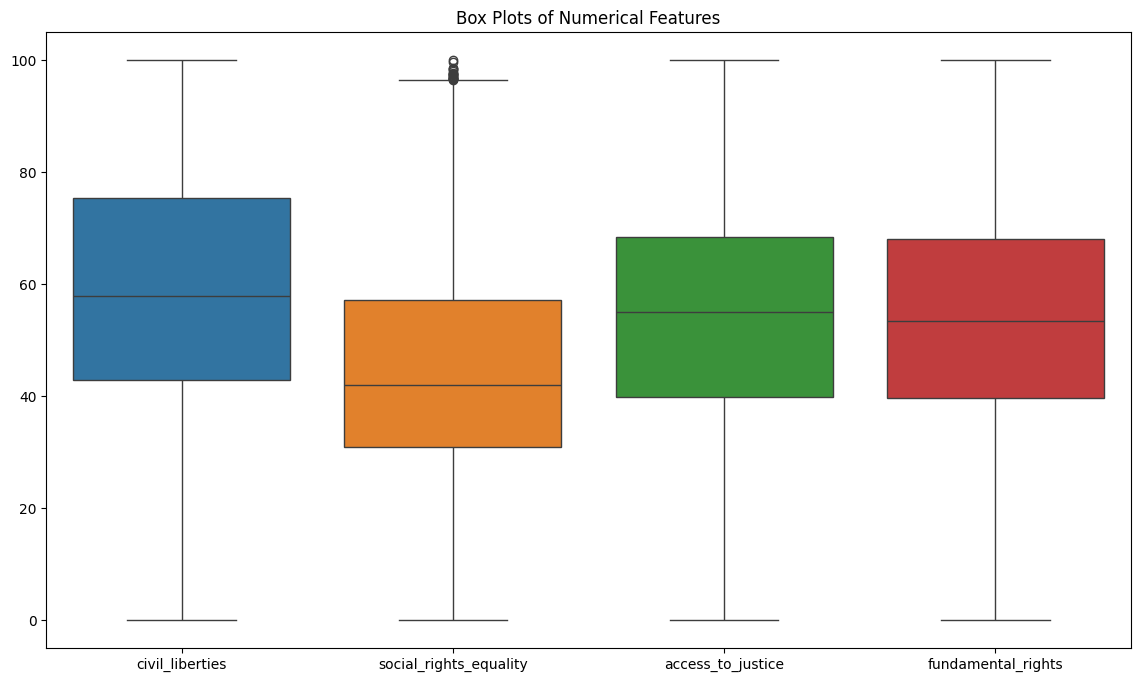

In [18]:
# Box Plots
plt.figure(figsize=(14, 8))
sns.boxplot(data=merged_df[['civil_liberties', 'social_rights_equality', 'access_to_justice', 'fundamental_rights']])
plt.title('Box Plots of Numerical Features')
plt.show()

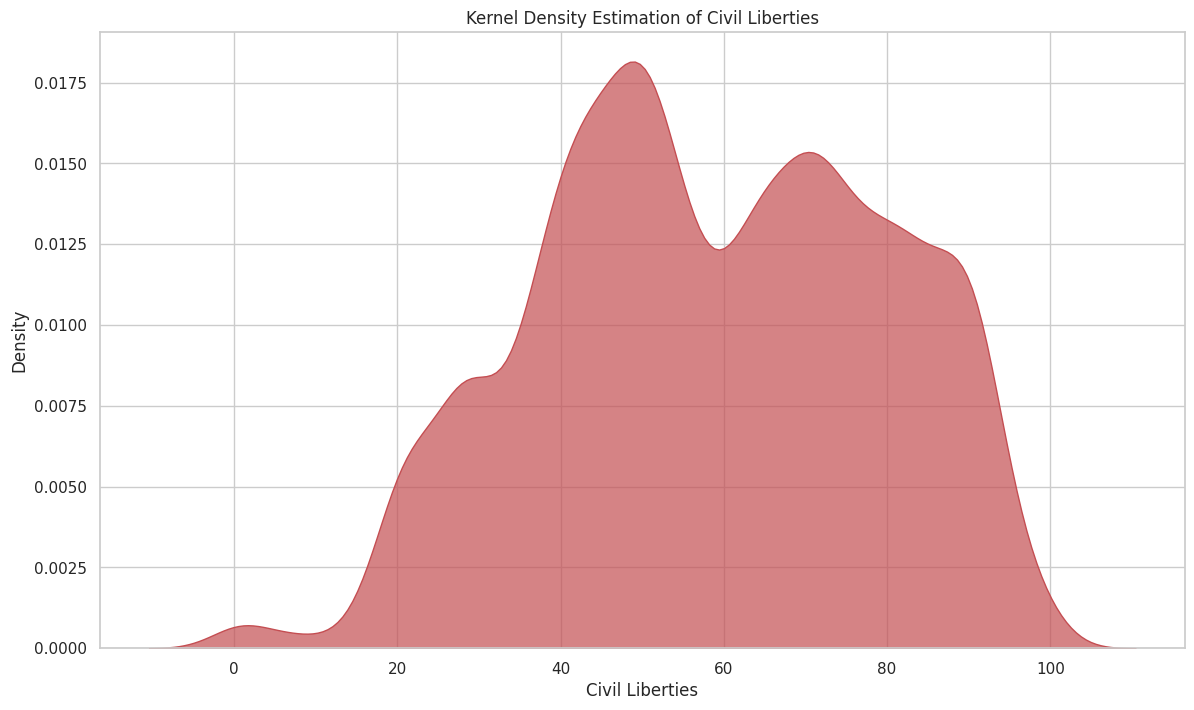

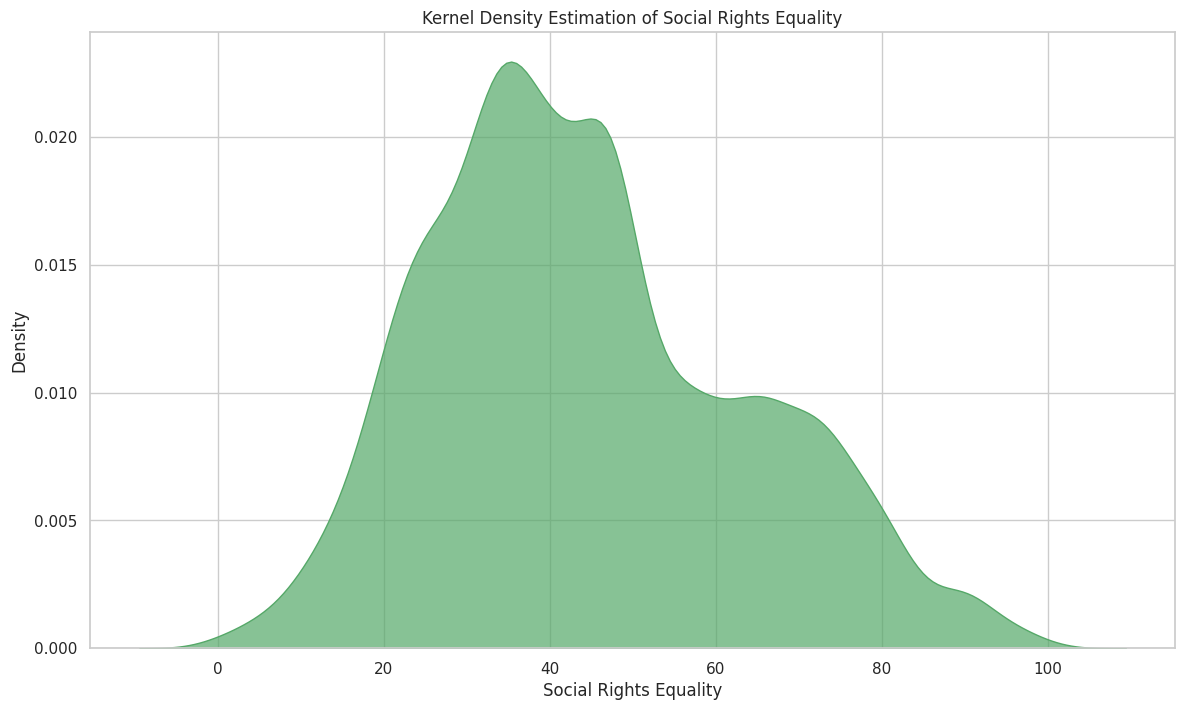

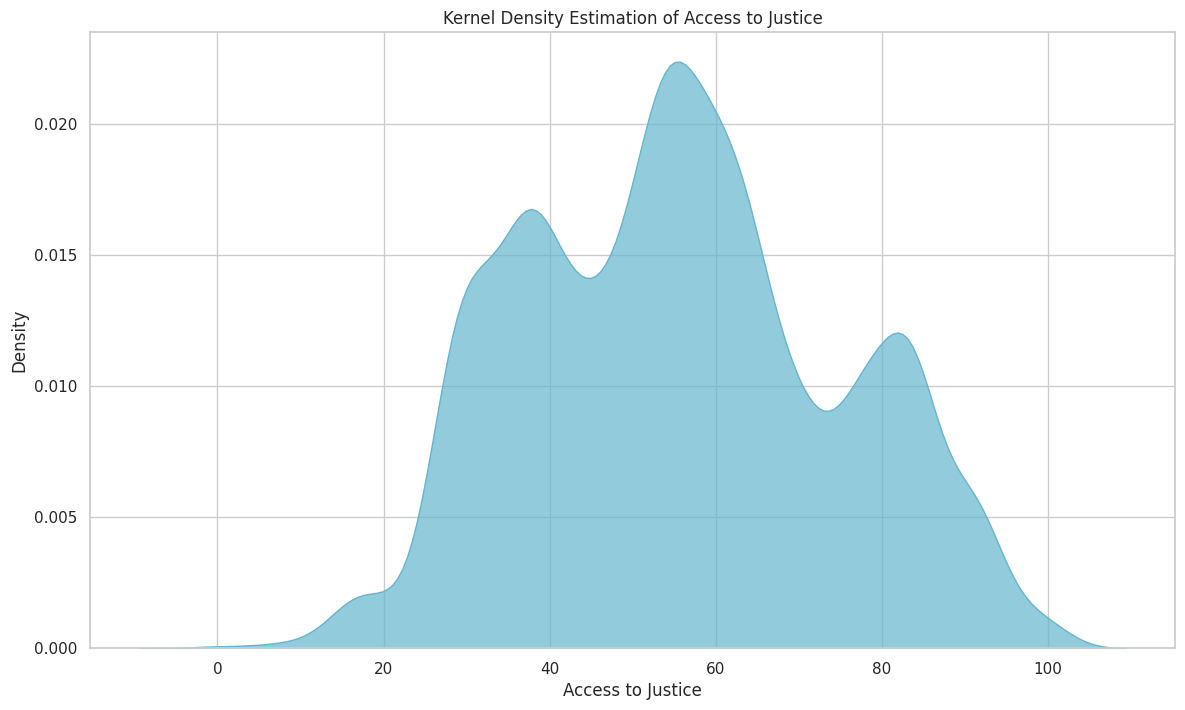

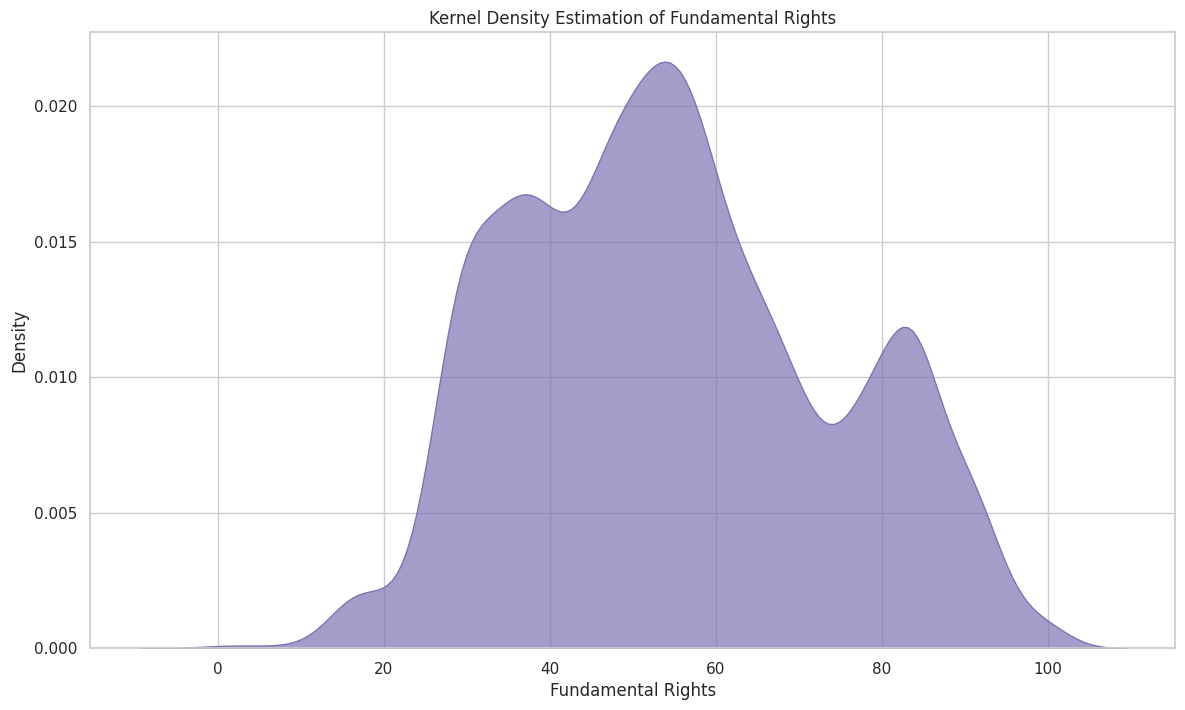

In [19]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# KDE Plot for Civil Liberties
plt.figure(figsize=(14, 8))
sns.kdeplot(merged_df['civil_liberties'], fill=True, color="r", alpha=0.7)
plt.title('Kernel Density Estimation of Civil Liberties')
plt.xlabel('Civil Liberties')
plt.ylabel('Density')
plt.show()

# KDE Plot for Social Rights Equality
plt.figure(figsize=(14, 8))
sns.kdeplot(merged_df['social_rights_equality'], fill=True, color="g", alpha=0.7)
plt.title('Kernel Density Estimation of Social Rights Equality')
plt.xlabel('Social Rights Equality')
plt.ylabel('Density')
plt.show()

# KDE Plot for Access to Justice
plt.figure(figsize=(14, 8))
sns.kdeplot(merged_df['access_to_justice'], fill=True, color="c", alpha=0.7)
plt.title('Kernel Density Estimation of Access to Justice')
plt.xlabel('Access to Justice')
plt.ylabel('Density')
plt.show()

# KDE Plot for Fundamental Rights
plt.figure(figsize=(14, 8))
sns.kdeplot(merged_df['fundamental_rights'], fill=True, color="m", alpha=0.7)
plt.title('Kernel Density Estimation of Fundamental Rights')
plt.xlabel('Fundamental Rights')
plt.ylabel('Density')
plt.show()


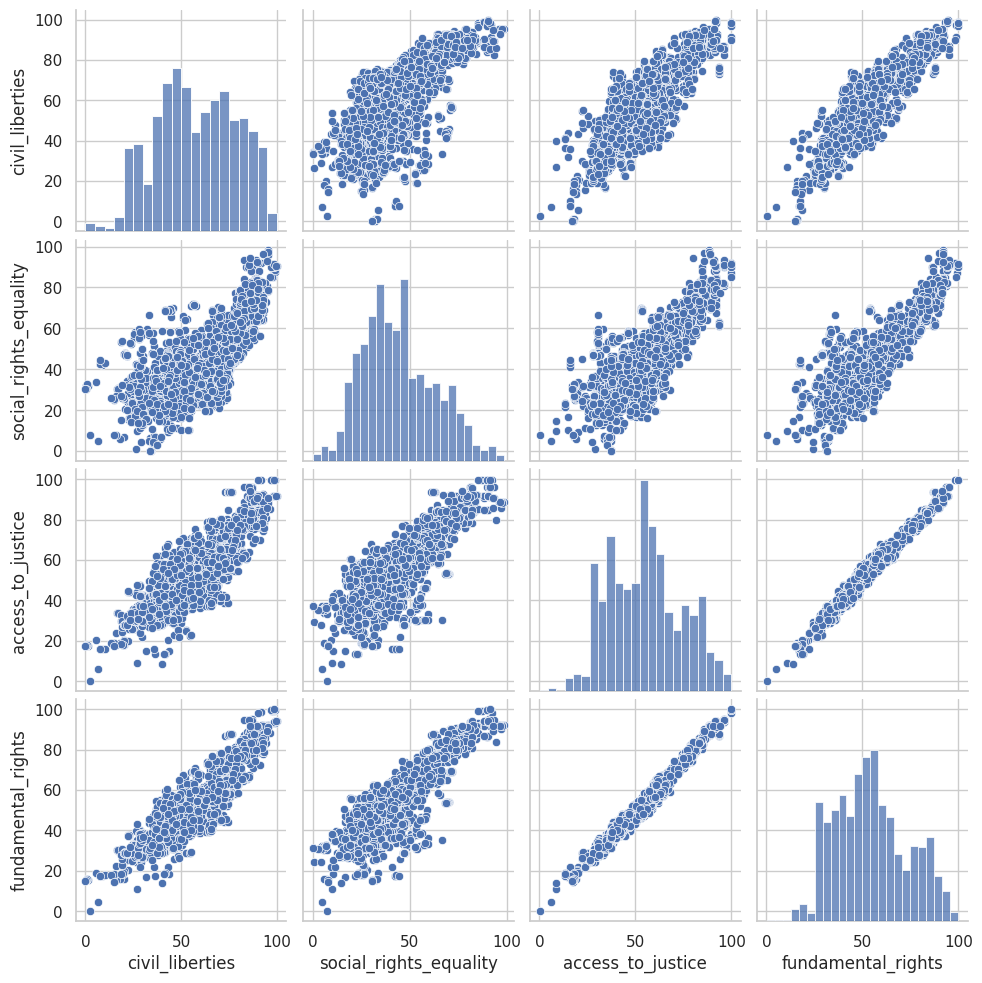

In [20]:
sns.pairplot(merged_df.sample(2000, random_state=42))
plt.show()

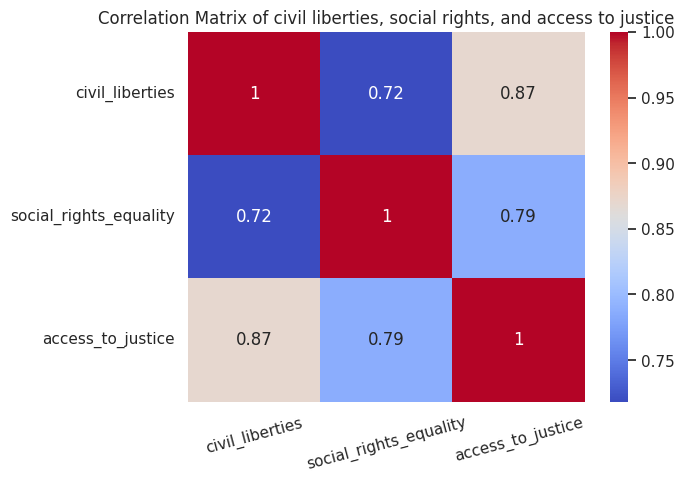

In [21]:
# Computing and plotting the correlation matrix
correlation_matrix = merged_df[['civil_liberties', 'social_rights_equality', 'access_to_justice']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of civil liberties, social rights, and access to justice')
plt.xticks(rotation=15, ha='center')  # Ruota di 45 gradi e allinea a destra
plt.show()

# 4. Model-based Analysis

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## 4.1 Linear Regression and Multiple Linear Regression

Can I predict values from 1 of the three sub-acrtibutes knowing the other 2?
Try to predict civil liberties index from Social rights index and access to justice index
Try to predict social rights index from civil liberties index and access to justice index

In [23]:
# Prepare data for Linear Regression and Multiple Linear Regression
X_multi = merged_df[['civil_liberties', 'social_rights_equality', 'access_to_justice']].values
Y_multi = merged_df['fundamental_rights'].values

X_civil = merged_df[['civil_liberties']].values
X_social = merged_df[['social_rights_equality']].values
X_justice = merged_df[['access_to_justice']].values
Y_fundamental = merged_df['fundamental_rights'].values

# Split data into training and testing sets
X_multi_train, X_multi_test, Y_multi_train, Y_multi_test = train_test_split(X_multi, Y_multi, test_size=0.2, random_state=42)

X_civil_train, X_civil_test, Y_fundamental_train, Y_fundamental_test = train_test_split(X_civil, Y_fundamental, test_size=0.2, random_state=42)
X_social_train, X_social_test, Y_fundamental_train, Y_fundamental_test = train_test_split(X_social, Y_fundamental, test_size=0.2, random_state=42)
X_justice_train, X_justice_test, Y_fundamental_train, Y_fundamental_test = train_test_split(X_justice, Y_fundamental, test_size=0.2, random_state=42)


### 4.1.1 Linear regression: civil liberties index to predict fundamental rights index

In [27]:
# Train model
model = LinearRegression()
model.fit(X_civil_train, Y_fundamental_train)

# Predictions
y_train_pred = model.predict(X_civil_train)
y_pred = model.predict(X_civil_test)

# Evaluating training
train_rmse = root_mean_squared_error(Y_fundamental_train, y_train_pred)
train_mae = mean_absolute_error(Y_fundamental_train, y_train_pred)
train_r2 = r2_score(Y_fundamental_train, y_train_pred)
train_evs = explained_variance_score(Y_fundamental_train, y_train_pred)
train_mbd = (Y_fundamental_train - y_train_pred).mean()
print("Training evaluations")
print(f'Root Mean Squared Error: {train_rmse}')
print(f'Mean Absolute Error: {train_mae}')
print(f'R^2 Score: {train_r2}')
print(f'Explained variance score: {train_evs}')
print(f'Mean Bias Deviation: {train_mbd}')
print("")

# Evaluate the model
rmse = root_mean_squared_error(Y_fundamental_test, y_pred)
mae = mean_absolute_error(Y_fundamental_test, y_pred)
r2 = r2_score(Y_fundamental_test, y_pred)
evs = explained_variance_score(Y_fundamental_test, y_pred)
mbd = (Y_fundamental_test - y_pred).mean()
print("Test evaluations")
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')
print(f'Explained variance score: {evs}')
print(f'Mean Bias Deviation: {mbd}')
print("")

Training evaluations
Root Mean Squared Error: 7.768872246235807
Mean Absolute Error: 6.279960262371874
R^2 Score: 0.8335156864755804
Explained variance score: 0.8335156864755804
Mean Bias Deviation: 9.448998805530944e-15

Test evaluations
Root Mean Squared Error: 7.562259756208931
Mean Absolute Error: 6.082634455143992
R^2 Score: 0.8375668802648558
Explained variance score: 0.8376478840787809
Mean Bias Deviation: 0.16887564927896623



### 4.1.2 Linear regression: social rights index to predict fundamental rights index

In [28]:
# Train model
model = LinearRegression()
model.fit(X_social_train, Y_fundamental_train)

# Predictions
y_train_pred = model.predict(X_social_train)
y_pred = model.predict(X_social_test)

# Evaluating training
train_rmse = root_mean_squared_error(Y_fundamental_train, y_train_pred)
train_mae = mean_absolute_error(Y_fundamental_train, y_train_pred)
train_r2 = r2_score(Y_fundamental_train, y_train_pred)
train_evs = explained_variance_score(Y_fundamental_train, y_train_pred)
train_mbd = (Y_fundamental_train - y_train_pred).mean()
print("Training evaluations")
print(f'Root Mean Squared Error: {train_rmse}')
print(f'Mean Absolute Error: {train_mae}')
print(f'R^2 Score: {train_r2}')
print(f'Explained variance score: {train_evs}')
print(f'Mean Bias Deviation: {train_mbd}')
print("")

# Evaluate the model
rmse = root_mean_squared_error(Y_fundamental_test, y_pred)
mae = mean_absolute_error(Y_fundamental_test, y_pred)
r2 = r2_score(Y_fundamental_test, y_pred)
evs = explained_variance_score(Y_fundamental_test, y_pred)
mbd = (Y_fundamental_test - y_pred).mean()
print("Test evaluations")
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')
print(f'Explained variance score: {evs}')
print(f'Mean Bias Deviation: {mbd}')
print("")

Training evaluations
Root Mean Squared Error: 10.27455149601856
Mean Absolute Error: 7.580864117291274
R^2 Score: 0.7088055412428663
Explained variance score: 0.7088055412428663
Mean Bias Deviation: 1.8634304621140095e-15

Test evaluations
Root Mean Squared Error: 10.663788044565488
Mean Absolute Error: 7.945062138381785
R^2 Score: 0.6770060314560227
Explained variance score: 0.6777768236699326
Mean Bias Deviation: -0.5209343046408123



### 4.1.3 Linear regression: access to justice index to predict fundamental rights index

In [29]:
# Train model
model = LinearRegression()
model.fit(X_justice_train, Y_fundamental_train)

# Predictions
y_train_pred = model.predict(X_justice_train)
y_pred = model.predict(X_justice_test)

# Evaluating training
train_rmse = root_mean_squared_error(Y_fundamental_train, y_train_pred)
train_mae = mean_absolute_error(Y_fundamental_train, y_train_pred)
train_r2 = r2_score(Y_fundamental_train, y_train_pred)
train_evs = explained_variance_score(Y_fundamental_train, y_train_pred)
train_mbd = (Y_fundamental_train - y_train_pred).mean()
print("Training evaluations")
print(f'Root Mean Squared Error: {train_rmse}')
print(f'Mean Absolute Error: {train_mae}')
print(f'R^2 Score: {train_r2}')
print(f'Explained variance score: {train_evs}')
print(f'Mean Bias Deviation: {train_mbd}')
print("")

# Evaluate the model
rmse = root_mean_squared_error(Y_fundamental_test, y_pred)
mae = mean_absolute_error(Y_fundamental_test, y_pred)
r2 = r2_score(Y_fundamental_test, y_pred)
evs = explained_variance_score(Y_fundamental_test, y_pred)
mbd = (Y_fundamental_test - y_pred).mean()
print("Test evaluations")
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')
print(f'Explained variance score: {evs}')
print(f'Mean Bias Deviation: {mbd}')
print("")

Training evaluations
Root Mean Squared Error: 2.557381828091117
Mean Absolute Error: 2.044101555112805
R^2 Score: 0.9819595025004207
Explained variance score: 0.9819595025004207
Mean Bias Deviation: 1.0510363089966164e-14

Test evaluations
Root Mean Squared Error: 2.5145273208571264
Mean Absolute Error: 2.0110247618682084
R^2 Score: 0.9820409185056982
Explained variance score: 0.982041539528403
Mean Bias Deviation: -0.014786590214442504



### 4.1.4 Multiple Linear regression: civil liberties index and social rights index to predict access to justice index

In [76]:
rmse_train = []
rmse_test = []
r2_train = []
r2_test = []
mbd_train = []
mbd_test = []

In [77]:
# Prepare data for Linear Regression and Multiple Linear Regression
X_multi_1 = merged_df[['civil_liberties', 'social_rights_equality']].values
Y_multi_1 = merged_df['access_to_justice'].values

# Split data into training and testing sets
X_multi_train_1, X_multi_test_1, Y_multi_train_1, Y_multi_test_1 = train_test_split(X_multi_1, Y_multi_1, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_multi_train_1, Y_multi_train_1)

# Predictions
y_train_pred = model.predict(X_multi_train_1)
y_pred = model.predict(X_multi_test_1)

# Evaluating training
train_rmse = root_mean_squared_error(Y_multi_train_1, y_train_pred)
train_mae = mean_absolute_error(Y_multi_train_1, y_train_pred)
train_r2 = r2_score(Y_multi_train_1, y_train_pred)
train_evs = explained_variance_score(Y_multi_train_1, y_train_pred)
train_mbd = (Y_multi_train_1 - y_train_pred).mean()
print("Training evaluations")
print(f'Root Mean Squared Error: {train_rmse}')
print(f'Mean Absolute Error: {train_mae}')
print(f'R^2 Score: {train_r2}')
print(f'Explained variance score: {train_evs}')
print(f'Mean Bias Deviation: {train_mbd}')
print("")

# Evaluate the model
rmse = root_mean_squared_error(Y_multi_test_1, y_pred)
mae = mean_absolute_error(Y_multi_test_1, y_pred)
r2 = r2_score(Y_multi_test_1, y_pred)
evs = explained_variance_score(Y_multi_test_1, y_pred)
mbd = (Y_multi_test_1 - y_pred).mean()
print("Test evaluations")
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')
print(f'Explained variance score: {evs}')
print(f'Mean Bias Deviation: {mbd}')
print("")

rmse_train.append(train_rmse)
rmse_test.append(rmse)
r2_train.append(train_r2)
r2_test.append(r2)
mbd_train.append(train_mbd)
mbd_test.append(mbd)

Training evaluations
Root Mean Squared Error: 8.24866029773765
Mean Absolute Error: 6.511911312543649
R^2 Score: 0.8109875892941112
Explained variance score: 0.8109875892941113
Mean Bias Deviation: 9.234967995377755e-14

Test evaluations
Root Mean Squared Error: 8.133427408141987
Mean Absolute Error: 6.456521112383546
R^2 Score: 0.8119669617799365
Explained variance score: 0.8119695092379747
Mean Bias Deviation: -0.029937121001102764



### 4.1.5 Multiple Linear regression: civil liberties index and access to justice index to predict social rights index

In [78]:
# Prepare data for Linear Regression and Multiple Linear Regression
X_multi_2 = merged_df[['civil_liberties', 'access_to_justice']].values
Y_multi_2 = merged_df['social_rights_equality'].values

# Split data into training and testing sets
X_multi_train_2, X_multi_test_2, Y_multi_train_2, Y_multi_test_2 = train_test_split(X_multi_2, Y_multi_2, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_multi_train_2, Y_multi_train_2)

# Predictions
y_train_pred = model.predict(X_multi_train_2)
y_pred = model.predict(X_multi_test_2)

# Evaluating training
train_rmse = root_mean_squared_error(Y_multi_train_2, y_train_pred)
train_mae = mean_absolute_error(Y_multi_train_2, y_train_pred)
train_r2 = r2_score(Y_multi_train_2, y_train_pred)
train_evs = explained_variance_score(Y_multi_train_2, y_train_pred)
train_mbd = (Y_multi_train_2 - y_train_pred).mean()
print("Training evaluations")
print(f'Root Mean Squared Error: {train_rmse}')
print(f'Mean Absolute Error: {train_mae}')
print(f'R^2 Score: {train_r2}')
print(f'Explained variance score: {train_evs}')
print(f'Mean Bias Deviation: {train_mbd}')
print("")

# Evaluate the model
rmse = root_mean_squared_error(Y_multi_test_2, y_pred)
mae = mean_absolute_error(Y_multi_test_2, y_pred)
r2 = r2_score(Y_multi_test_2, y_pred)
evs = explained_variance_score(Y_multi_test_2, y_pred)
mbd = (Y_multi_test_2 - y_pred).mean()
print("Test evaluations")
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')
print(f'Explained variance score: {evs}')
print(f'Mean Bias Deviation: {mbd}')
print("")

rmse_train.append(train_rmse)
rmse_test.append(rmse)
r2_train.append(train_r2)
r2_test.append(r2)
mbd_train.append(train_mbd)
mbd_test.append(mbd)

Training evaluations
Root Mean Squared Error: 11.598541864296338
Mean Absolute Error: 9.149887315021823
R^2 Score: 0.6312163787478282
Explained variance score: 0.6312163787478282
Mean Bias Deviation: 3.174863598658397e-14

Test evaluations
Root Mean Squared Error: 11.805279411654457
Mean Absolute Error: 9.308523773050863
R^2 Score: 0.594820996527232
Explained variance score: 0.5952911357482522
Mean Bias Deviation: 0.4021296040885467



### 4.1.6 Multiple Linear regression:  access to justice index and social rights index to predict civil liberties index

In [79]:
# Prepare data for Linear Regression and Multiple Linear Regression
X_multi_3 = merged_df[['social_rights_equality', 'access_to_justice']].values
Y_multi_3 = merged_df['civil_liberties'].values

# Split data into training and testing sets
X_multi_train_3, X_multi_test_3, Y_multi_train_3, Y_multi_test_3 = train_test_split(X_multi_3, Y_multi_3, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_multi_train_3, Y_multi_train_3)

# Predictions
y_train_pred = model.predict(X_multi_train_3)
y_pred = model.predict(X_multi_test_3)

# Evaluating training
train_rmse = root_mean_squared_error(Y_multi_train_3, y_train_pred)
train_mae = mean_absolute_error(Y_multi_train_3, y_train_pred)
train_r2 = r2_score(Y_multi_train_3, y_train_pred)
train_evs = explained_variance_score(Y_multi_train_3, y_train_pred)
train_mbd = (Y_multi_train_3 - y_train_pred).mean()
print("Training evaluations")
print(f'Root Mean Squared Error: {train_rmse}')
print(f'Mean Absolute Error: {train_mae}')
print(f'R^2 Score: {train_r2}')
print(f'Explained variance score: {train_evs}')
print(f'Mean Bias Deviation: {train_mbd}')
print("")

# Evaluate the model
rmse = root_mean_squared_error(Y_multi_test_3, y_pred)
mae = mean_absolute_error(Y_multi_test_3, y_pred)
r2 = r2_score(Y_multi_test_3, y_pred)
evs = explained_variance_score(Y_multi_test_3, y_pred)
mbd = (Y_multi_test_3 - y_pred).mean()
print("Test evaluations")
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')
print(f'Explained variance score: {evs}')
print(f'Mean Bias Deviation: {mbd}')
print("")

rmse_train.append(train_rmse)
rmse_test.append(rmse)
r2_train.append(train_r2)
r2_test.append(r2)
mbd_train.append(train_mbd)
mbd_test.append(mbd)

Training evaluations
Root Mean Squared Error: 10.335714340451249
Mean Absolute Error: 8.364626628404011
R^2 Score: 0.7587119577145531
Explained variance score: 0.7587119577145531
Mean Bias Deviation: 2.5147521472208402e-14

Test evaluations
Root Mean Squared Error: 10.175528746785398
Mean Absolute Error: 8.204992998044231
R^2 Score: 0.7639040938163663
Explained variance score: 0.7642940871712862
Mean Bias Deviation: -0.4135626988553053



### 4.1.7 Multiple Linear regression:  access to justice index, social rights index and civil liberties index and social rights index  to predict fundamental rights index

In [80]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_multi_train, Y_multi_train)

# Predictions
y_train_pred = model.predict(X_multi_train)
y_pred = model.predict(X_multi_test)

# Evaluating training
train_rmse = root_mean_squared_error(Y_fundamental_train, y_train_pred)
train_mae = mean_absolute_error(Y_fundamental_train, y_train_pred)
train_r2 = r2_score(Y_fundamental_train, y_train_pred)
train_evs = explained_variance_score(Y_fundamental_train, y_train_pred)
train_mbd = (Y_fundamental_train - y_train_pred).mean()
print("Training evaluations")
print(f'Root Mean Squared Error: {train_rmse}')
print(f'Mean Absolute Error: {train_mae}')
print(f'R^2 Score: {train_r2}')
print(f'Explained variance score: {train_evs}')
print(f'Mean Bias Deviation: {train_mbd}')
print("")

# Evaluate the model
rmse = root_mean_squared_error(Y_fundamental_test, y_pred)
mae = mean_absolute_error(Y_fundamental_test, y_pred)
r2 = r2_score(Y_fundamental_test, y_pred)
evs = explained_variance_score(Y_fundamental_test, y_pred)
mbd = (Y_fundamental_test - y_pred).mean()
print("Test evaluations")
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')
print(f'Explained variance score: {evs}')
print(f'Mean Bias Deviation: {mbd}')
print("")

rmse_train.append(train_rmse)
rmse_test.append(rmse)
r2_train.append(train_r2)
r2_test.append(r2)
mbd_train.append(train_mbd)
mbd_test.append(mbd)

Training evaluations
Root Mean Squared Error: 0.2925099072365816
Mean Absolute Error: 0.11789081920396968
R^2 Score: 0.9997639855897986
Explained variance score: 0.9997639855897986
Mean Bias Deviation: 5.0721071931259204e-14

Test evaluations
Root Mean Squared Error: 0.3278836753525667
Mean Absolute Error: 0.1223991649163246
R^2 Score: 0.9996946408113565
Explained variance score: 0.9996946600673989
Mean Bias Deviation: 0.002603741194320324



### 4.1.8 Plots

In [83]:
# Sample Data
models = ['civil liberties index and social rights index to predict access to justice index',
          'civil liberties index and access to justice index to predict social rights index',
          'access to justice index and social rights index to predict civil liberties index',
          'access to justice index, social rights index and civil liberties index and social rights index to predict fundamental rights index']
models = ['predict access to justice index',
          'predict social rights index',
          'predict civil liberties index',
          'predict fundamental rights index']

x = np.arange(len(models))


In [84]:
# Data preparation
metrics = ['RMSE', 'R² Score', 'Mean Bias Deviation']
train_data = [rmse_train, r2_train, mbd_train]
test_data = [rmse_test, r2_test, mbd_test]

data = {'Model': models}
for i, metric in enumerate(metrics):
    data[f'Train {metric}'] = train_data[i]
    data[f'Test {metric}'] = test_data[i]

df_plot = pd.DataFrame(data)
df_melted = df_plot.melt(id_vars='Model', var_name='Metric', value_name='Value')


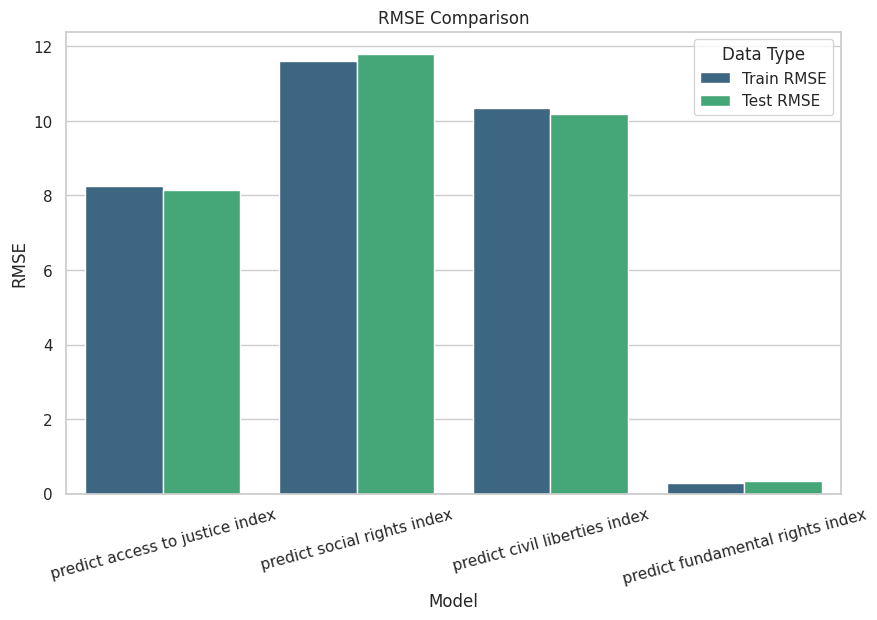

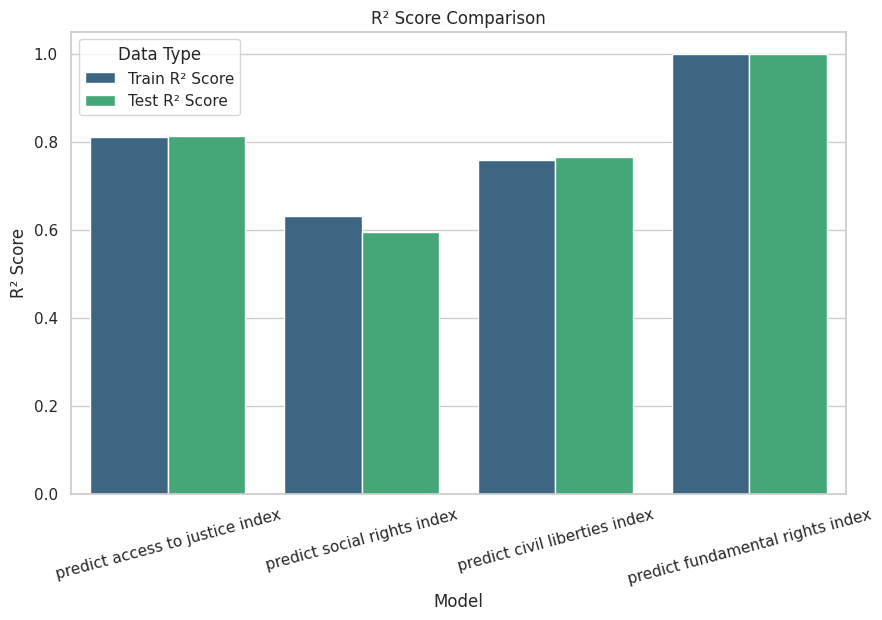

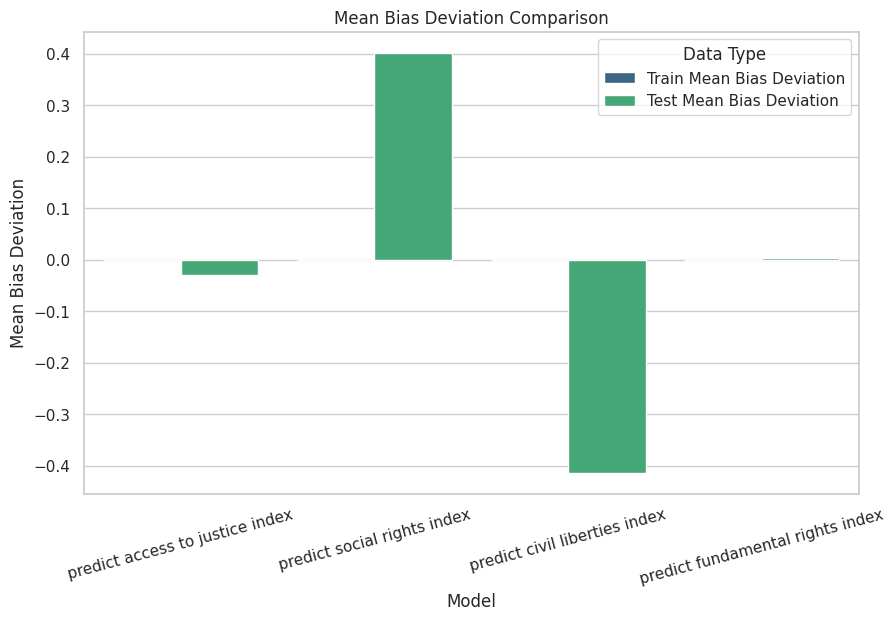

In [85]:
# Set the seaborn theme and palette
sns.set_theme(style="whitegrid")
palette = sns.color_palette("viridis", 2)  # Two colors for train and test

# RMSE Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Value', hue='Metric', data=df_melted[df_melted['Metric'].str.contains('RMSE')], palette=palette)
plt.title('RMSE Comparison')
plt.ylabel('RMSE')
plt.legend(title='Data Type')
plt.xticks(rotation=15, ha='center')  # Rotate x-axis labels by 30 degrees
plt.show()

# R² Score Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Value', hue='Metric', data=df_melted[df_melted['Metric'].str.contains('R² Score')], palette=palette)
plt.title('R² Score Comparison')
plt.ylabel('R² Score')
plt.legend(title='Data Type')
plt.xticks(rotation=15, ha='center')  # Rotate x-axis labels by 30 degrees
plt.show()

# Mean Bias Deviation Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Value', hue='Metric', data=df_melted[df_melted['Metric'].str.contains('Mean Bias Deviation')], palette=palette)
plt.title('Mean Bias Deviation Comparison')
plt.ylabel('Mean Bias Deviation')
plt.legend(title='Data Type')
plt.xticks(rotation=15, ha='center')  # Rotate x-axis labels by 30 degrees
plt.show()


## 4.2 Support Vector Machines (SVM)

In [87]:
# One-hot encoding
one_hot_encoder = OneHotEncoder()
encoded_countries = one_hot_encoder.fit_transform(merged_df[['country']]).toarray()

# Add one-hot encoded columns to the DataFrame
df = merged_df.drop('country', axis=1)
df_encoded = pd.DataFrame(encoded_countries, columns=one_hot_encoder.categories_)
df = pd.concat([df, df_encoded], axis=1)


Support Vector Machine => Support Vector Regressor


In [104]:
import time

def calculate_fitting_time(model, X_train, y_train):
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    fitting_time = end_time - start_time
    return fitting_time


In [ ]:
# Calculate fitting times
fitting_time1 = calculate_fitting_time(model1, X_train, y_train)
fitting_time2 = calculate_fitting_time(model2, X_train, y_train)
fitting_time3 = calculate_fitting_time(model3, X_train, y_train)

# Store times in a dictionary for plotting
fitting_times = {
    'Linear Regression': fitting_time1,
    'Random Forest': fitting_time2,
    'Support Vector Regression': fitting_time3
}


In [88]:
# Define features and target
X = df[['civil_liberties', 'social_rights_equality', 'access_to_justice']].values
Y = df['fundamental_rights'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [105]:
# Initialize the SVR model
svr_model_1 = SVR(kernel='rbf')  # You can use other kernels like 'linear', 'poly', etc.
svr_model_2 = SVR(kernel='linear')
svr_model_3 = SVR(kernel='poly')

fitting_time1 = calculate_fitting_time(svr_model_1, X_train, Y_train)
fitting_time2 = calculate_fitting_time(svr_model_2, X_train, Y_train)
fitting_time3 = calculate_fitting_time(svr_model_3, X_train, Y_train)


# Train the model
#svr_model_1.fit(X_train, Y_train)
#svr_model_2.fit(X_train, Y_train)
#svr_model_3.fit(X_train, Y_train)

<ipython-input-107-d8cc6b6bed5c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=times, palette='viridis')


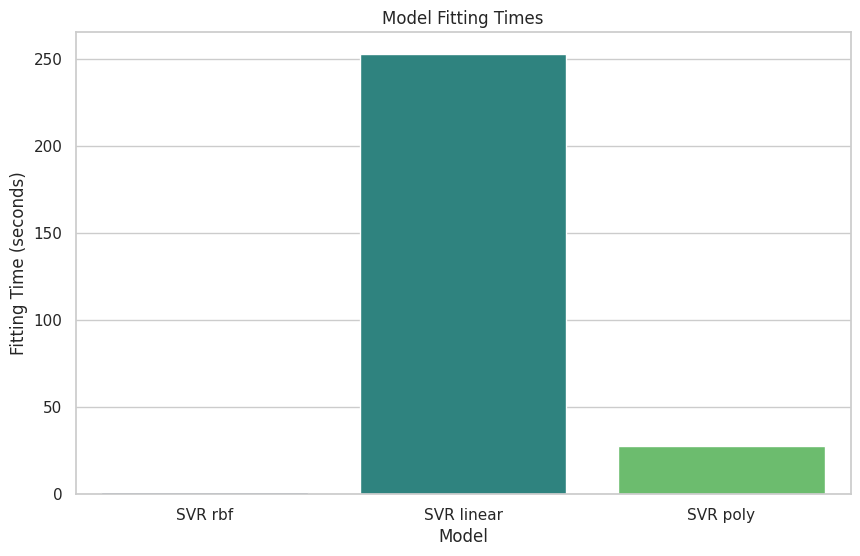

In [107]:
# Store times in a dictionary for plotting
fitting_times = { 'SVR rbf': fitting_time1, 'SVR linear': fitting_time2, 'SVR poly': fitting_time3 }

# Prepare data for plotting
models = list(fitting_times.keys())
times = list(fitting_times.values())

# Plot the fitting times
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=times, palette='viridis')
plt.title('Model Fitting Times')
plt.xlabel('Model')
plt.ylabel('Fitting Time (seconds)')
plt.show()


In [103]:
# Make predictions and evaluate the model

# Model 1
y_pred = svr_model_1.predict(X_test)

rmse = root_mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
evs = explained_variance_score(Y_test, y_pred)
mbd = (Y_test - y_pred).mean()
print("Test evaluation model 1")
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')
print(f'Explained variance score: {evs}')
print(f'Mean Bias Deviation: {mbd}')
print("")

# Model 2
y_pred = svr_model_2.predict(X_test)

rmse = root_mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
evs = explained_variance_score(Y_test, y_pred)
mbd = (Y_test - y_pred).mean()
print("Test evaluation model 2")
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')
print(f'Explained variance score: {evs}')
print(f'Mean Bias Deviation: {mbd}')
print("")

# Model 3
y_pred = svr_model_3.predict(X_test)

rmse = root_mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
evs = explained_variance_score(Y_test, y_pred)
mbd = (Y_test - y_pred).mean()
print("Test evaluation model 3")
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')
print(f'Explained variance score: {evs}')
print(f'Mean Bias Deviation: {mbd}')
print("")

Test evaluation model 1
Root Mean Squared Error: 0.6746080698923392
Mean Absolute Error: 0.23555705398690185
R^2 Score: 0.9987073692948208
Explained variance score: 0.9987073774032508
Mean Bias Deviation: 0.001689595266020238

Test evaluation model 2
Root Mean Squared Error: 0.32876245783500524
Mean Absolute Error: 0.1208840144491992
R^2 Score: 0.999693001791609
Explained variance score: 0.9996935124578542
Mean Bias Deviation: 0.013408582675772468

Test evaluation model 3
Root Mean Squared Error: 5.27816610794188
Mean Absolute Error: 3.803662945898464
R^2 Score: 0.9208706658680882
Explained variance score: 0.9233415152224863
Mean Bias Deviation: -0.9326902394261684



il primo modello ci mette pochi secondi

il secondo modello ci mette 4 minuti

il terzo modello ci mette una trentina di secondi

-------------------------------------------------------------------------------------

## 4.3 Decion Tree and Random Forest

In [97]:
model = DecisionTreeRegressor()

# fit the model with the training data
model.fit(X_train, Y_train)

# depth of the decision tree
print('Depth of the Decision Tree :', model.tree_.max_depth)

# predict the target on the test dataset
predict_train = model.predict(X_train)

# Root Mean Squared Error on training dataset
rmse_train = root_mean_squared_error(Y_train, predict_train)
print('RMSE for Decision tree on train dataset : ', rmse_train)

# predict the target on the testing dataset
predict_test = model.predict(X_test)

# Root Mean Squared Error on testing dataset
rmse_test = root_mean_squared_error(Y_test, predict_test)
print('RMSE for Decision tree on test dataset : ', rmse_test)

Depth of the Decision Tree : 24
RMSE for Decision tree on train dataset :  0.006829866766447223
RMSE for Decision tree on test dataset :  0.5170309725659141


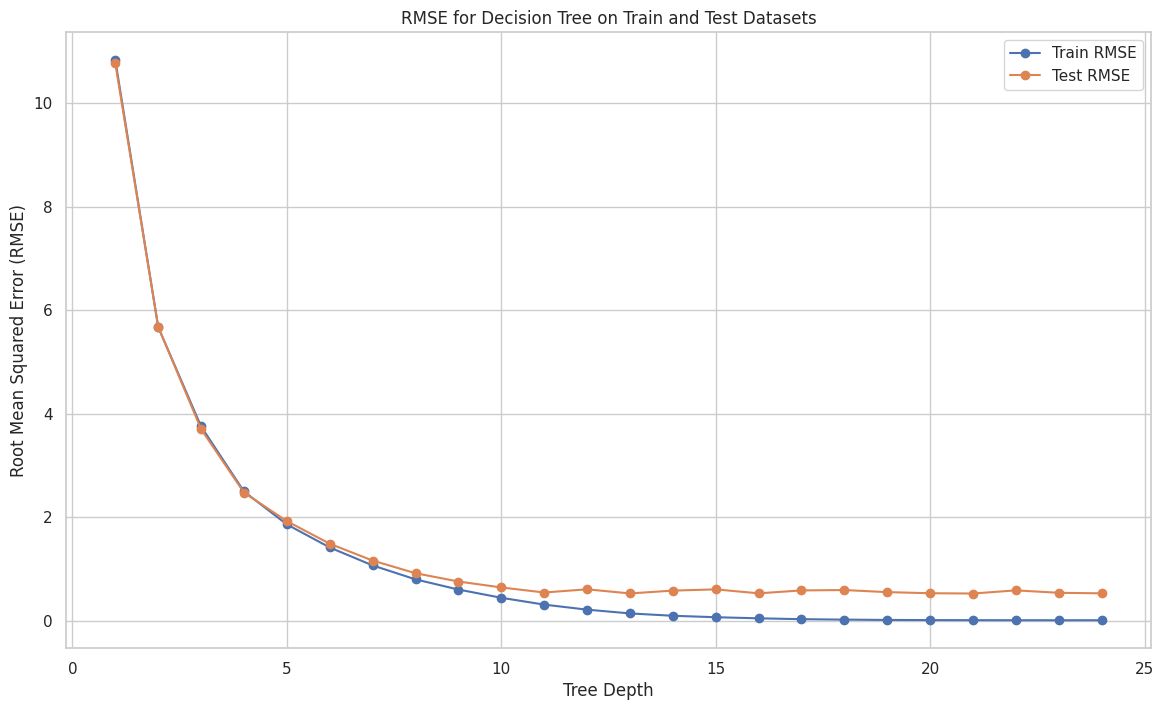

In [98]:
# Lists to store RMSE values
rmse_train_list = []
rmse_test_list = []
depth_list = []

for i in range (1, 25):

  # initialize the model with a specific max depth
  model = DecisionTreeRegressor(max_depth = i)

  # fit the model with the training data
  model.fit(X_train, Y_train)

  # predict the target on the test dataset
  predict_train = model.predict(X_train)

  # Root Mean Squared Error on training dataset
  rmse_train = root_mean_squared_error(Y_train, predict_train)
  rmse_train_list.append(rmse_train)

  # predict the target on the testing dataset
  predict_test = model.predict(X_test)

  # Root Mean Squared Error on testing dataset
  rmse_test = root_mean_squared_error(Y_test, predict_test)
  rmse_test_list.append(rmse_test)

  # Store the depth value
  depth_list.append(i)


# Plotting the results
plt.figure(figsize=(14, 8))
plt.plot(depth_list, rmse_train_list, label='Train RMSE', marker='o')
plt.plot(depth_list, rmse_test_list, label='Test RMSE', marker='o')
plt.title('RMSE for Decision Tree on Train and Test Datasets')
plt.xlabel('Tree Depth')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.legend()
plt.grid(True)
plt.show()


In [99]:
# Find the depth with the lowest RMSE on the test dataset
min_rmse_test = min(rmse_test_list)
optimal_depth = depth_list[rmse_test_list.index(min_rmse_test)]

# Print the optimal depth
print(f'The depth with the lowest RMSE on the test dataset is: {optimal_depth}')


The depth with the lowest RMSE on the test dataset is: 21


In [101]:
# Initialize and train the model with a specific max depth
model = DecisionTreeRegressor(max_depth = 12)
model.fit(X_train, Y_train)

# predict the target on the test dataset
predict_train = model.predict(X_train)
y_pred = model.predict(X_test)

# Root Mean Squared Error on training dataset
rmse_train = root_mean_squared_error(Y_train, predict_train)
r2_train = r2_score(Y_train, predict_train)
mbd_train = (Y_train - predict_train).mean()
print("Train evaluation Random Forest:")
print(f'Root Mean Squared Error: {rmse_train}')
print(f'R^2 Score: {r2_train}')
print(f'Mean Bias Deviation: {mbd_train}')
print()

rmse = root_mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
mbd = (Y_test - y_pred).mean()
print("Test evaluation Random Forest:")
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')
print(f'Mean Bias Deviation: {mbd}')

Train evaluation Random Forest:
Root Mean Squared Error: 0.21161664299503877
R^2 Score: 0.999876474391688
Mean Bias Deviation: -3.098392631581077e-16

Test evaluation Random Forest:
Root Mean Squared Error: 0.5436192558952401
R^2 Score: 0.999160615264118
Mean Bias Deviation: 0.018733142542772727


In [91]:
# Train model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, Y_train)

# Predictions
predict_train = rf_model.predict(X_train)
y_pred = rf_model.predict(X_test)

# Root Mean Squared Error on training dataset
rmse_train = root_mean_squared_error(Y_train, predict_train)
r2_train = r2_score(Y_train, predict_train)
mbd_train = (Y_train - predict_train).mean()
print("Train evaluation Random Forest:")
print(f'Root Mean Squared Error: {rmse_train}')
print(f'R^2 Score: {r2_train}')
print(f'Mean Bias Deviation: {mbd_train}')
print()

rmse = root_mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
mbd = (Y_test - y_pred).mean()
print("Test evaluation Random Forest:")
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')
print(f'Mean Bias Deviation: {mbd}')

Train evaluation Random Forest:
Root Mean Squared Error: 0.14358125581519507
R^2 Score: 0.9999431339771695
Mean Bias Deviation: 0.0028983793913415815

Test evaluation Random Forest:
Root Mean Squared Error: 0.35363574981481843
R^2 Score: 0.9996447911901938
Mean Bias Deviation: 0.011455488117324


# 5. Time Series Analysis

In [109]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA

In [110]:
# One-hot encoding
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_countries = one_hot_encoder.fit_transform(merged_df[['country']])

# Add one-hot encoded columns to the DataFrame
df = merged_df.drop('country', axis=1)

# Get feature names and convert them to strings
feature_names = np.array(one_hot_encoder.get_feature_names_out(['country'])).astype(str)
df_encoded = pd.DataFrame(encoded_countries, columns=feature_names)
df = pd.concat([df, df_encoded], axis=1)

# Convert 'year' to datetime and set it as the index
df['year'] = pd.to_datetime(df['year'], format='%Y')
#df.set_index('year', inplace=True)

# Define variables
features = ['country', 'year', 'fundamental_rights']
targets = ['civil_liberties', 'social_rights_equality', 'access_to_justice']

# Split data based on year
#X = df[df.index.year < 2017].drop(columns=targets)  # Features: data before 2017, excluding target columns
#y = df[df.index.year = 2017][targets]  # Targets: target columns for years 2017 and later

# Split the dataset into training and testing sets based on 'year'
train_df = df[df['year'].dt.year < 2017]
test_df = df[df['year'].dt.year >= 2017]

# Ensure both train and test sets have the same columns after encoding
test_df = test_df.reindex(columns=train_df.columns, fill_value=0)

# Split features and targets
X_train = train_df.drop(targets, axis=1)
y_train = train_df[targets]
X_test = test_df.drop(targets, axis=1)
y_test = test_df[targets]

# Convert 'year' column to numeric representation (e.g., ordinal) before scaling
X_train['year'] = X_train['year'].dt.year
X_test['year'] = X_test['year'].dt.year

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [116]:
# Initialize and train the SVR model
svr_models = {target: SVR(kernel='rbf', C=1.0, epsilon=0.1) for target in targets}

metrics = {target: {'train_rmse': 0, 'test_rmse': 0, 'train_r2': 0, 'test_r2': 0, 'train_mbd': 0, 'test_mbd': 0} for target in targets}

for target in targets:
    svr_models[target].fit(X_train_scaled, y_train[target])

# Predictions and evaluation
y_train_pred = {target: svr_models[target].predict(X_train_scaled) for target in targets}
y_test_pred = {target: svr_models[target].predict(X_test_scaled) for target in targets}

for target in targets:
    train_rmse = root_mean_squared_error(y_train[target], y_train_pred[target])
    test_rmse = root_mean_squared_error(y_test[target], y_test_pred[target])
    train_r2 = r2_score(y_train[target], y_train_pred[target])
    test_r2 = r2_score(y_test[target], y_test_pred[target])

    print(f'--- {target} ---')
    print(f'Training RMSE: {train_rmse}')
    print(f'Testing RMSE: {test_rmse}')
    print(f'Training R^2: {train_r2}')
    print(f'Testing R^2: {test_r2}')
    print()

    # Evaluation Metrics
    metrics[target]['train_rmse'] = train_rmse
    metrics[target]['test_rmse'] = test_rmse
    metrics[target]['train_r2'] = train_r2
    metrics[target]['test_r2'] = test_r2

# Convert metrics dictionary to a DataFrame for plotting
metrics_df = pd.DataFrame.from_dict(metrics, orient='index')

# Prepare data for plotting
metrics_melted = metrics_df.reset_index().melt(id_vars='index', var_name='Metric', value_name='Value')

--- civil_liberties ---
Training RMSE: 9.540370206424601
Testing RMSE: 7.687735074505338
Training R^2: 0.7992586933798627
Testing R^2: 0.8218678221642974

--- social_rights_equality ---
Training RMSE: 5.005662710192869
Testing RMSE: 5.1086088251951844
Training R^2: 0.9301904180260329
Testing R^2: 0.9242957779606332

--- access_to_justice ---
Training RMSE: 6.5624276589555075
Testing RMSE: 5.437027517105597
Training R^2: 0.8816210553126408
Testing R^2: 0.9021147070249596



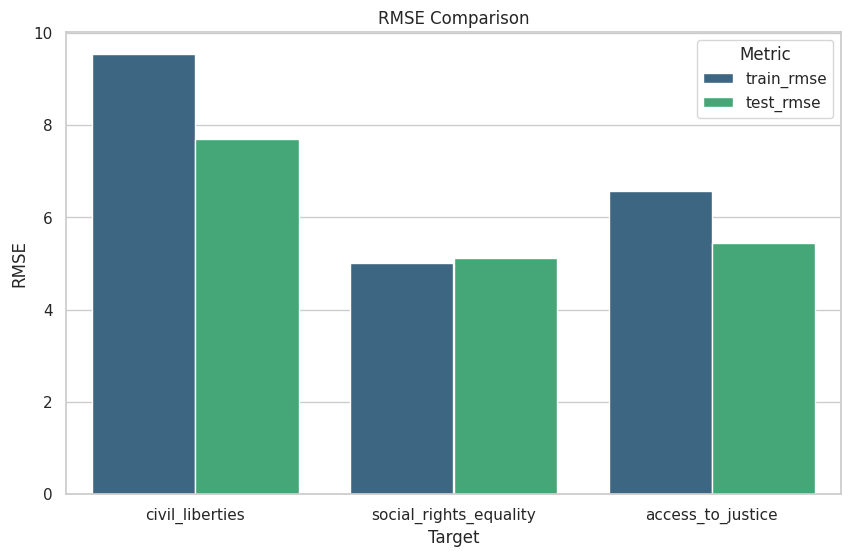

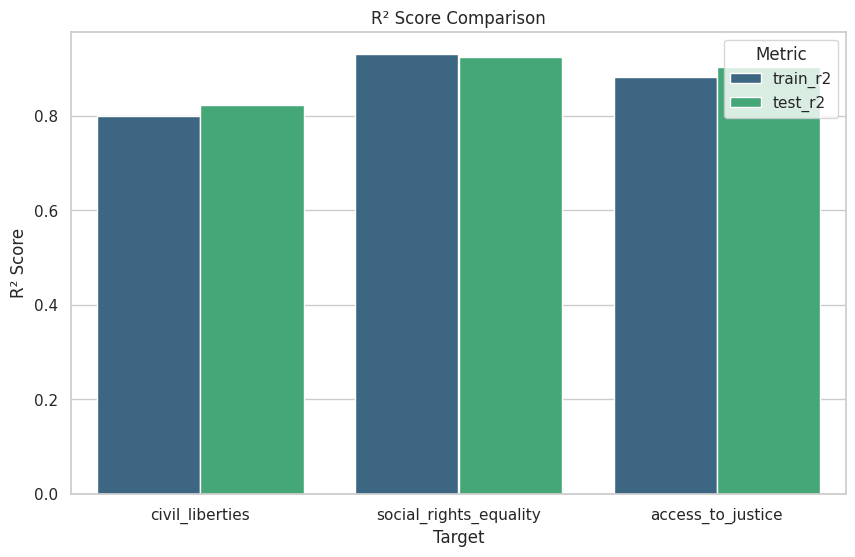

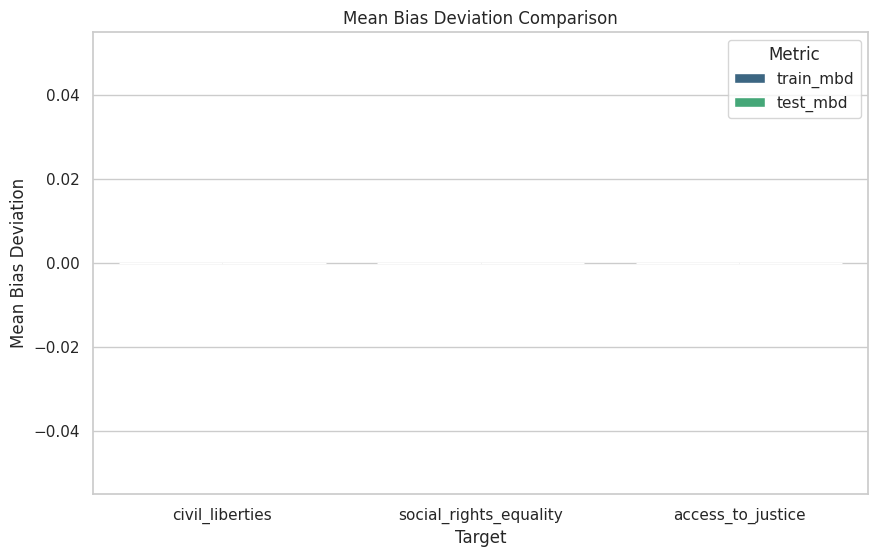

In [117]:
# Set the seaborn theme and palette
sns.set_theme(style="whitegrid")
palette = sns.color_palette("viridis", 2)  # Two colors for train and test

# RMSE Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='Value', hue='Metric', data=metrics_melted[metrics_melted['Metric'].str.contains('rmse')], palette=palette)
plt.title('RMSE Comparison')
plt.xlabel('Target')
plt.ylabel('RMSE')
plt.legend(title='Metric', loc='upper right')
plt.show()

# R² Score Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='Value', hue='Metric', data=metrics_melted[metrics_melted['Metric'].str.contains('r2')], palette=palette)
plt.title('R² Score Comparison')
plt.xlabel('Target')
plt.ylabel('R² Score')
plt.legend(title='Metric', loc='upper right')
plt.show()

# Mean Bias Deviation Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='Value', hue='Metric', data=metrics_melted[metrics_melted['Metric'].str.contains('mbd')], palette=palette)
plt.title('Mean Bias Deviation Comparison')
plt.xlabel('Target')
plt.ylabel('Mean Bias Deviation')
plt.legend(title='Metric', loc='upper right')
plt.show()


In [118]:
# Initialize and train the Multiple Linear Regression model
mlr_models = {target: LinearRegression() for target in targets}

metrics = {target: {'train_rmse': 0, 'test_rmse': 0, 'train_r2': 0, 'test_r2': 0, 'train_mbd': 0, 'test_mbd': 0} for target in targets}

for target in targets:
    mlr_models[target].fit(X_train, y_train[target])

# Predictions and evaluation
y_train_pred = {target: mlr_models[target].predict(X_train) for target in targets}
y_test_pred = {target: mlr_models[target].predict(X_test) for target in targets}

for target in targets:
    train_rmse = root_mean_squared_error(y_train[target], y_train_pred[target])
    test_rmse = root_mean_squared_error(y_test[target], y_test_pred[target])
    train_r2 = r2_score(y_train[target], y_train_pred[target])
    test_r2 = r2_score(y_test[target], y_test_pred[target])

    print(f'--- {target} ---')
    print(f'Training RMSE: {train_rmse}')
    print(f'Testing RMSE: {test_rmse}')
    print(f'Training R^2: {train_r2}')
    print(f'Testing R^2: {test_r2}')
    print()

        # Evaluation Metrics
    metrics[target]['train_rmse'] = train_rmse
    metrics[target]['test_rmse'] = test_rmse
    metrics[target]['train_r2'] = train_r2
    metrics[target]['test_r2'] = test_r2

# Convert metrics dictionary to a DataFrame for plotting
metrics_df = pd.DataFrame.from_dict(metrics, orient='index')

# Prepare data for plotting
metrics_melted = metrics_df.reset_index().melt(id_vars='index', var_name='Metric', value_name='Value')


--- civil_liberties ---
Training RMSE: 4.380689445110072
Testing RMSE: 5.680585188753558
Training R^2: 0.9576755596318745
Testing R^2: 0.9027405712877837

--- social_rights_equality ---
Training RMSE: 4.035661422882411
Testing RMSE: 4.51911652232157
Training R^2: 0.954624510970244
Testing R^2: 0.9407590681613816

--- access_to_justice ---
Training RMSE: 1.2018863387533818
Testing RMSE: 1.6693529684401036
Training R^2: 0.996029253116942
Testing R^2: 0.9907723581399522



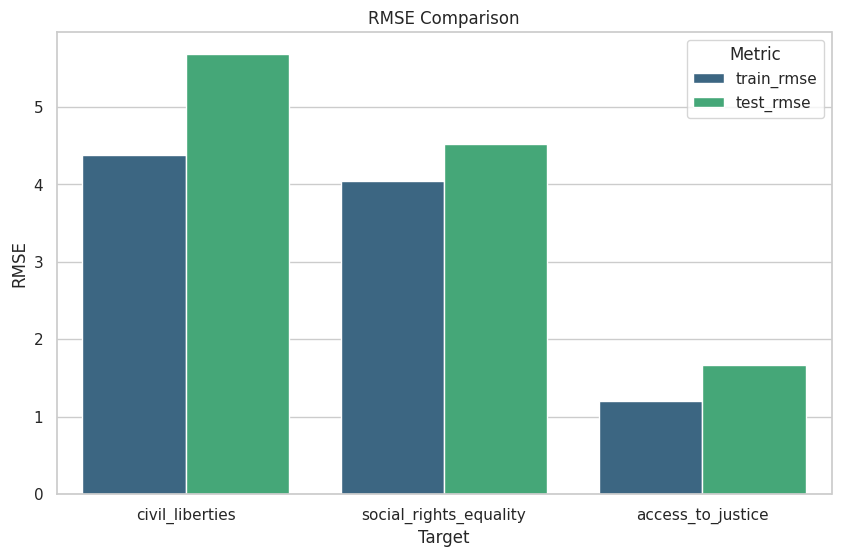

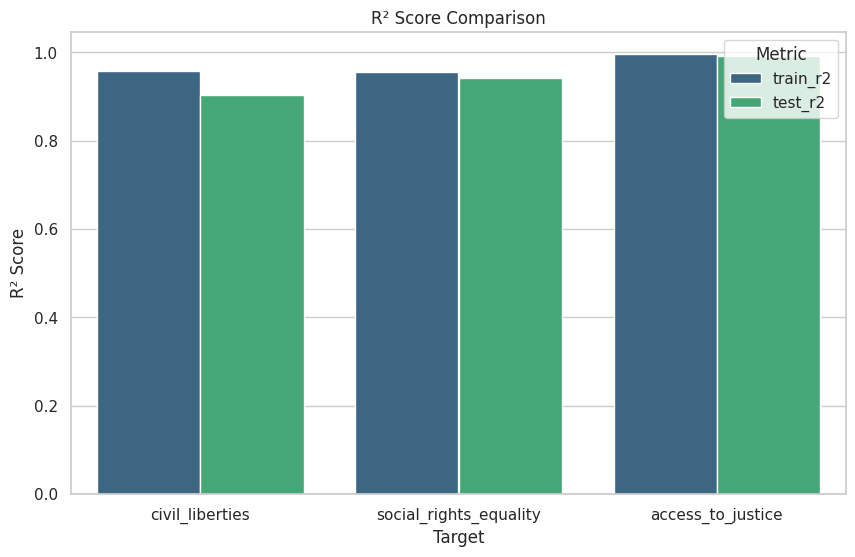

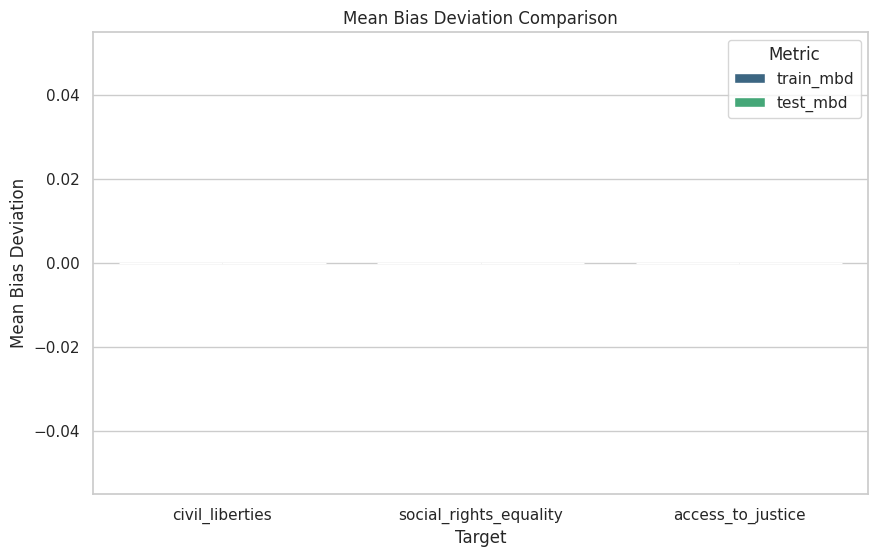

In [119]:
# Set the seaborn theme and palette
sns.set_theme(style="whitegrid")
palette = sns.color_palette("viridis", 2)  # Two colors for train and test

# RMSE Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='Value', hue='Metric', data=metrics_melted[metrics_melted['Metric'].str.contains('rmse')], palette=palette)
plt.title('RMSE Comparison')
plt.xlabel('Target')
plt.ylabel('RMSE')
plt.legend(title='Metric', loc='upper right')
plt.show()

# R² Score Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='Value', hue='Metric', data=metrics_melted[metrics_melted['Metric'].str.contains('r2')], palette=palette)
plt.title('R² Score Comparison')
plt.xlabel('Target')
plt.ylabel('R² Score')
plt.legend(title='Metric', loc='upper right')
plt.show()

# Mean Bias Deviation Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='Value', hue='Metric', data=metrics_melted[metrics_melted['Metric'].str.contains('mbd')], palette=palette)
plt.title('Mean Bias Deviation Comparison')
plt.xlabel('Target')
plt.ylabel('Mean Bias Deviation')
plt.legend(title='Metric', loc='upper right')
plt.show()

For predicting future values, use time series models such as ARIMA or LSTM networks

In [120]:
df_italy = merged_df[merged_df['country'] == 'Italy']
df_italy = df_italy.reset_index(drop=True)

In [133]:
# Time series analysis
ts_model_1 = ARIMA(df_italy['civil_liberties'], order=(5,1,0))
ts_model_fit_1 = ts_model_1.fit()

# Time series analysis
ts_model_2 = ARIMA(df_italy['social_rights_equality'], order=(5,1,0))
ts_model_fit_2 = ts_model_2.fit()

# Forecast
forecast_1 = ts_model_fit_1.forecast(steps=7)
forecast_2 = ts_model_fit_2.forecast(steps=7)

In [134]:
forecast_1

,predicted_mean
47,81.150053
48,80.955794
49,80.454871
50,79.668132
51,79.647722
52,79.740559
53,79.687800


In [135]:
forecast_2

,predicted_mean
47,83.646259
48,83.132821
49,83.328565
50,83.668892
51,83.751619
52,83.741135
53,83.669886


# 6. Comparative analysis

Comparative Analysis

Compare the indicators across countries and over time to identify patterns and relationships.

Average Comparison: Compare average values of indicators by country.

Trend Analysis: Compare how indicators change over time for different countries.

Advanced Modeling: Use statistical or machine learning models to predict future values and understand deeper relationships.

In [127]:
# Convert 'year' to datetime
#merged_df['year'] = pd.to_datetime(merged_df['year'], format='%Y')

#country_means = merged_df.groupby('country')['fundamental_rights'].mean().sort_values()

# Create the box plot with ordered countries
plt.figure(figsize=(14, 8))
sns.boxplot(x='country', y='access_to_justice', data=merged_df, order=country_means.index)
plt.title('Access to Justice Across Countries (Ordered by Mean)')
plt.xlabel('Country')
plt.ylabel('Access to Justice')
plt.xticks([])
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(x='country', y='civil_liberties', data=merged_df, order=country_means.index)
plt.title('Civil Liberties Across Countries (Ordered by Mean)')
plt.xlabel('Country')
plt.ylabel('Civil Liberties')
plt.xticks([])
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(x='country', y='social_rights_equality', data=merged_df, order=country_means.index)
plt.title('Social Rights and Equality Across Countries (Ordered by Mean)')
plt.xlabel('Country')
plt.ylabel('Social Rights Equality')
plt.xticks([])
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(x='country', y='fundamental_rights', data=merged_df, order=country_means.index)
plt.title('Fundamental Rights Across Countries (Ordered by Mean)')
plt.xlabel('Country')
plt.ylabel('Civil Liberties')
plt.xticks([])
plt.show()


NameError: name 'country_means' is not defined

<Figure size 1400x800 with 0 Axes>

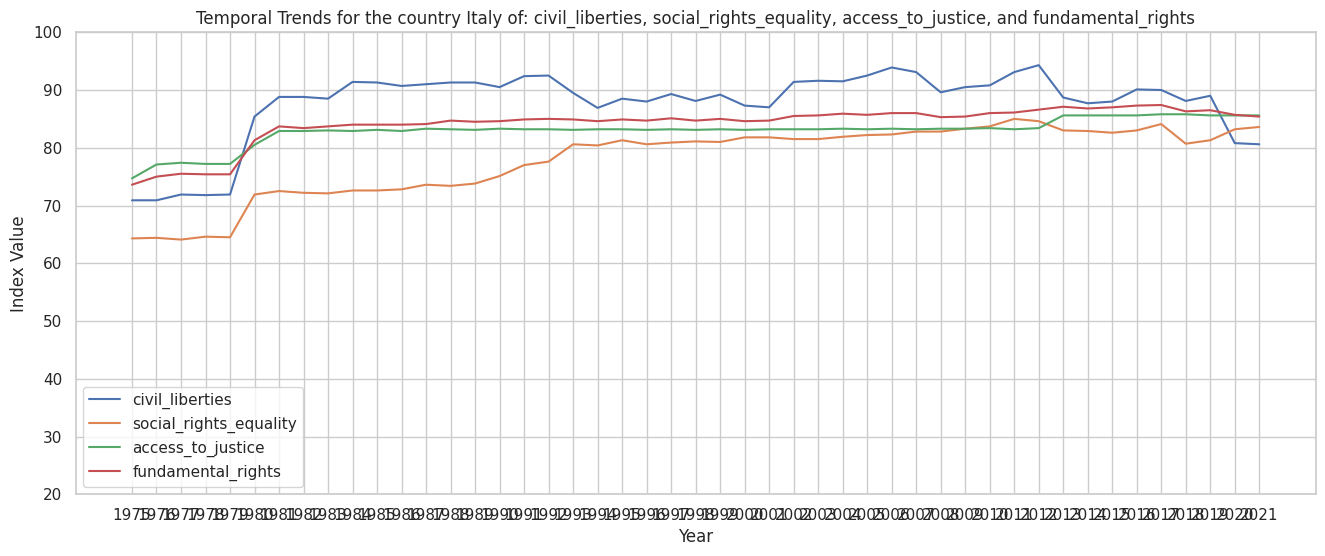

In [128]:
# Plotting temporal trends for each index for the country Italy

country_data = merged_df[merged_df['country'] == 'Italy']

plt.figure(figsize=(16, 6))
for column in ['civil_liberties', 'social_rights_equality', 'access_to_justice', 'fundamental_rights']:
  plt.plot(country_data.year, country_data[column], label=column)

plt.title('Temporal Trends for the country Italy of: civil_liberties, social_rights_equality, access_to_justice, and fundamental_rights')
plt.xlabel('Year')
plt.ylabel('Index Value')
plt.legend(loc='best')
plt.ylim(20, 100)
plt.show()

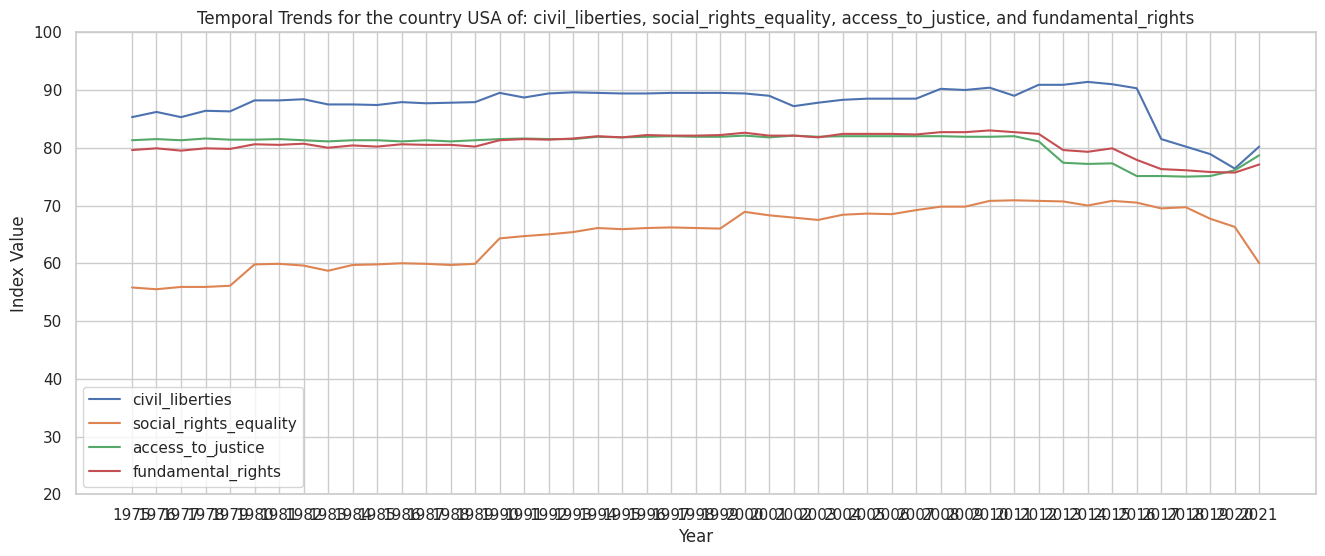

In [129]:
# Plotting temporal trends for each index for the country USA

country_data = merged_df[merged_df['country'] == 'USA']

plt.figure(figsize=(16, 6))
for column in ['civil_liberties', 'social_rights_equality', 'access_to_justice', 'fundamental_rights']:
  plt.plot(country_data.year, country_data[column], label=column)

plt.title('Temporal Trends for the country USA of: civil_liberties, social_rights_equality, access_to_justice, and fundamental_rights')
plt.xlabel('Year')
plt.ylabel('Index Value')
plt.legend(loc='best')
plt.ylim(20, 100)  # Set min to 25 and max to 85 for a better visualization
plt.show()

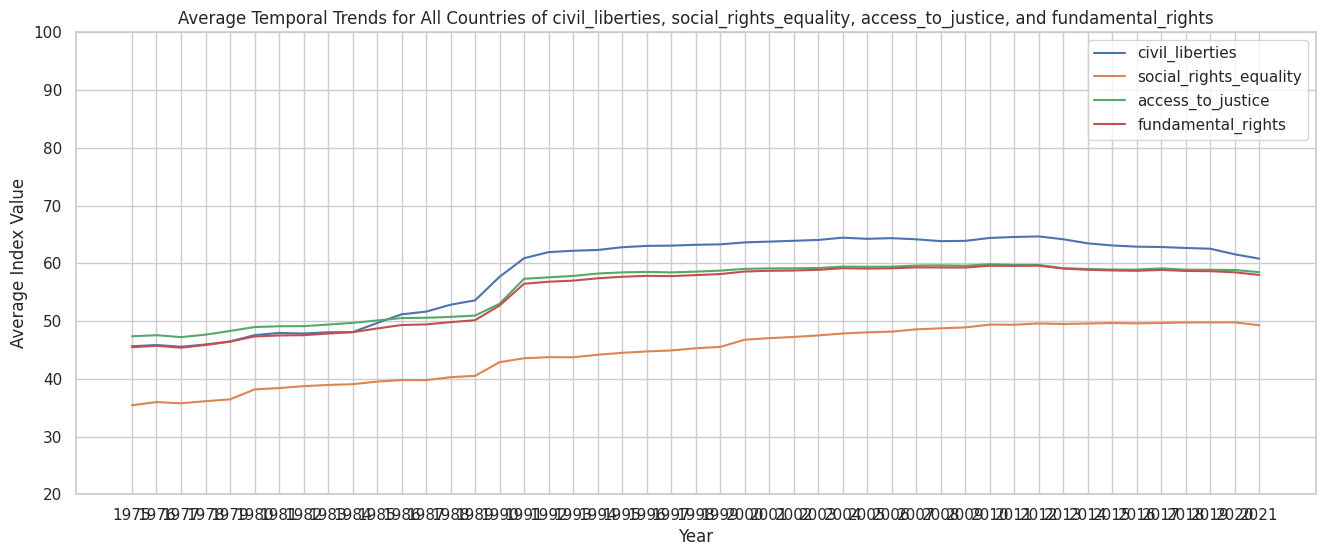

In [130]:
#Plotting average trends of the four index for all countries
avg_data = merged_df.groupby('year')[['civil_liberties', 'social_rights_equality', 'access_to_justice', 'fundamental_rights']].mean()

plt.figure(figsize=(16, 6))
for column in ['civil_liberties', 'social_rights_equality', 'access_to_justice', 'fundamental_rights']:
  plt.plot(avg_data.index, avg_data[column], label=column)

plt.title('Average Temporal Trends for All Countries of civil_liberties, social_rights_equality, access_to_justice, and fundamental_rights')
plt.xlabel('Year')
plt.ylabel('Average Index Value')
plt.legend(loc='best')
plt.ylim(20, 100)  # Set min to 25 and max to 85 for a better visualization
plt.show()

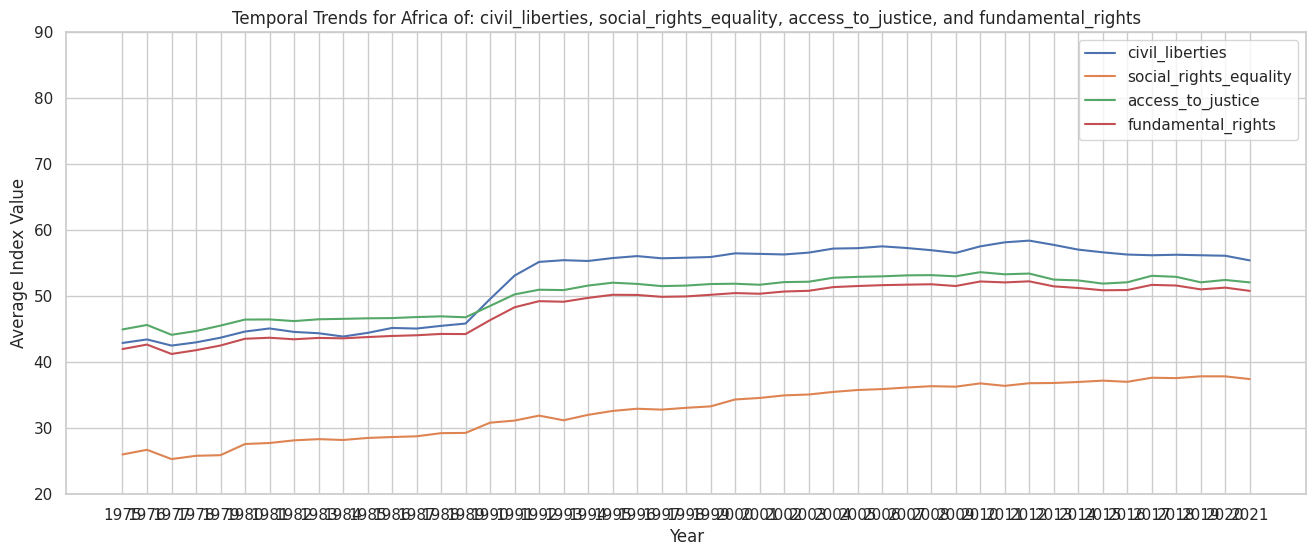

KeyboardInterrupt: 

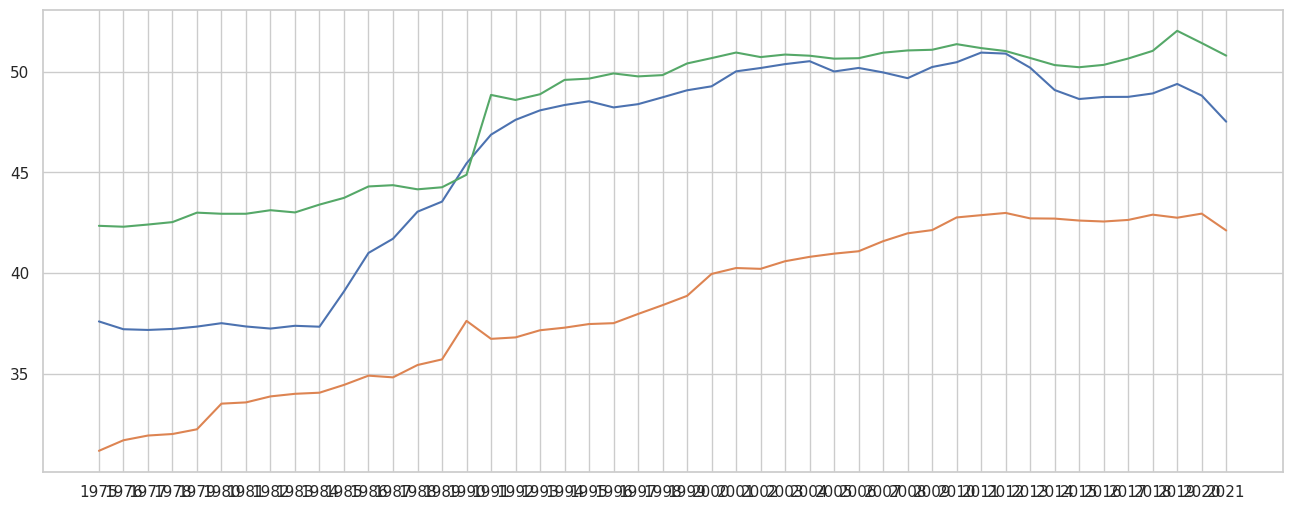

In [131]:
def plot_regional_trends(df):
  """Calculates and plots the average of four indices for each region over time.

  Args:
    df: The input DataFrame containing country, year, and index data.
  """

  # Define a dictionary mapping countries to regions (same as before)
  country_to_region = {
        'Afghanistan': 'Asia', 'Angola': 'Africa', 'Albania': 'Europe', 'UAE': 'Asia',
        'Argentina': 'South America', 'Armenia': 'Asia', 'Australia': 'Oceania', 'Austria': 'Europe',
        'Azerbaijan': 'Asia', 'Burundi': 'Africa', 'Belgium': 'Europe', 'Benin': 'Africa',
        'Burkina Faso': 'Africa', 'Bangladesh': 'Asia', 'Bulgaria': 'Europe', 'Bahrain': 'Asia',
        'Bosnia and Herzegovina': 'Europe', 'Belarus': 'Europe', 'Bolivia': 'South America',
        'Brazil': 'South America', 'Barbados': 'North America', 'Bhutan': 'Asia', 'Botswana': 'Africa',
        'Central African Republic': 'Africa', 'Canada': 'North America', 'Switzerland': 'Europe',
        'Chile': 'South America', 'China': 'Asia', "Cote d'Ivoire": 'Africa', 'Cameroon': 'Africa',
        'Congo, Dem. Rep.': 'Africa', 'Congo, Rep.': 'Africa', 'Colombia': 'South America',
        'Comoros': 'Africa', 'Cape Verde': 'Africa', 'Costa Rica': 'North America', 'Cuba': 'North America',
        'Cyprus': 'Europe', 'Czech Republic': 'Europe', 'Germany': 'Europe', 'Djibouti': 'Africa',
        'Denmark': 'Europe', 'Dominican Republic': 'North America', 'Algeria': 'Africa', 'Ecuador': 'South America',
        'Egypt': 'Africa', 'Eritrea': 'Africa', 'Spain': 'Europe', 'Estonia': 'Europe', 'Ethiopia': 'Africa',
        'Finland': 'Europe', 'Fiji': 'Oceania', 'France': 'Europe', 'Gabon': 'Africa', 'UK': 'Europe',
        'Georgia': 'Europe', 'Ghana': 'Africa', 'Guinea': 'Africa', 'Gambia': 'Africa', 'Guinea-Bissau': 'Africa',
        'Equatorial Guinea': 'Africa', 'Greece': 'Europe', 'Guatemala': 'North America', 'Guyana': 'South America',
        'Honduras': 'North America', 'Croatia': 'Europe', 'Haiti': 'North America', 'Hungary': 'Europe',
        'Indonesia': 'Asia', 'India': 'Asia', 'Ireland': 'Europe', 'Iran': 'Asia', 'Iraq': 'Asia',
        'Iceland': 'Europe', 'Israel': 'Asia', 'Italy': 'Europe', 'Jamaica': 'North America', 'Jordan': 'Asia',
        'Japan': 'Asia', 'Kazakhstan': 'Asia', 'Kenya': 'Africa', 'Kyrgyz Republic': 'Asia', 'Cambodia': 'Asia',
        'South Korea': 'Asia', 'Kuwait': 'Asia', 'Lao': 'Asia', 'Lebanon': 'Asia', 'Liberia': 'Africa',
        'Libya': 'Africa', 'Sri Lanka': 'Asia', 'Lesotho': 'Africa', 'Lithuania': 'Europe', 'Luxembourg': 'Europe',
        'Latvia': 'Europe', 'Morocco': 'Africa', 'Moldova': 'Europe', 'Madagascar': 'Africa', 'Maldives': 'Asia',
        'Mexico': 'North America', 'North Macedonia': 'Europe', 'Mali': 'Africa', 'Malta': 'Europe',
        'Myanmar': 'Asia', 'Montenegro': 'Europe', 'Mongolia': 'Asia', 'Mozambique': 'Africa',
        'Mauritania': 'Africa', 'Mauritius': 'Africa', 'Malawi': 'Africa', 'Malaysia': 'Asia',
        'Namibia': 'Africa', 'Niger': 'Africa', 'Nigeria': 'Africa', 'Nicaragua': 'North America',
        'Netherlands': 'Europe', 'Norway': 'Europe', 'Nepal': 'Asia', 'New Zealand': 'Oceania',
        'Oman': 'Asia', 'Pakistan': 'Asia', 'Panama': 'North America', 'Peru': 'South America',
        'Philippines': 'Asia', 'Papua New Guinea': 'Oceania', 'Poland': 'Europe', 'North Korea': 'Asia',
        'Portugal': 'Europe', 'Paraguay': 'South America',  'Palestine': 'Asia', 'Qatar': 'Asia',
        'Romania': 'Europe', 'Russia': 'Asia', 'Rwanda': 'Africa', 'Saudi Arabia': 'Asia', 'Sudan': 'Africa',
        'Senegal': 'Africa', 'Singapore': 'Asia', 'Solomon Islands': 'Oceania', 'Sierra Leone': 'Africa',
        'El Salvador': 'North America', 'Somalia': 'Africa', 'Serbia': 'Europe', 'South Sudan': 'Africa',
        'Suriname': 'South America', 'Slovak Republic': 'Europe', 'Slovenia': 'Europe', 'Sweden': 'Europe',
        'Eswatini': 'Africa', 'Syria': 'Asia', 'Chad': 'Africa', 'Togo': 'Africa', 'Thailand': 'Asia',
        'Tajikistan': 'Asia', 'Turkmenistan': 'Asia', 'Timor-Leste': 'Asia', 'Trinidad and Tobago': 'North America',
        'Tunisia': 'Africa', 'Turkey': 'Asia', 'Taiwan': 'Asia', 'Tanzania': 'Africa', 'Uganda': 'Africa',
        'Ukraine': 'Europe', 'Uruguay': 'South America', 'USA': 'North America', 'Uzbekistan': 'Asia',
        'Venezuela': 'South America', 'Vietnam': 'Asia', 'Vanuatu': 'Oceania',
        'Yemen': 'Asia', 'South Africa': 'Africa', 'Zambia': 'Africa', 'Zimbabwe': 'Africa'
        }

  # Create a new 'region' column based on the dictionary
  df['region'] = df['country'].map(country_to_region)

  # Group by region and year, then calculate the average of the four indices
  avg_by_region_year = df.groupby(['region', 'year'])[['civil_liberties', 'social_rights_equality', 'access_to_justice', 'fundamental_rights']].mean()
  avg_by_region_year = avg_by_region_year.reset_index()

  # Plot temporal trends for each region
  for region in avg_by_region_year['region'].unique():
    region_data = avg_by_region_year[avg_by_region_year['region'] == region]
    plt.figure(figsize=(16, 6))

    # Select every other year for plotting
    years_to_plot = region_data['year'][::2]  # Adjust the step (2 here) for desired interval

    for column in ['civil_liberties', 'social_rights_equality', 'access_to_justice', 'fundamental_rights']:
      values_to_plot = region_data[column][::2]  # Adjust step to match years
      plt.plot(region_data['year'], region_data[column], label=column)

    plt.title(f'Temporal Trends for {region} of: civil_liberties, social_rights_equality, access_to_justice, and fundamental_rights')
    plt.xlabel('Year')
    plt.ylabel('Average Index Value')
    plt.legend(loc='best')

    plt.ylim(20, 90)  # Set min to 25 and max to 85 for a better visualization

    plt.show()

# Example usage
plot_regional_trends(merged_df)

In [ ]:
country_to_region = {
      'Afghanistan': 'Asia', 'Angola': 'Africa', 'Albania': 'Europe', 'UAE': 'Asia',
      'Argentina': 'South America', 'Armenia': 'Asia', 'Australia': 'Oceania', 'Austria': 'Europe',
      'Azerbaijan': 'Asia', 'Burundi': 'Africa', 'Belgium': 'Europe', 'Benin': 'Africa',
      'Burkina Faso': 'Africa', 'Bangladesh': 'Asia', 'Bulgaria': 'Europe', 'Bahrain': 'Asia',
      'Bosnia and Herzegovina': 'Europe', 'Belarus': 'Europe', 'Bolivia': 'South America',
      'Brazil': 'South America', 'Barbados': 'North America', 'Bhutan': 'Asia', 'Botswana': 'Africa',
      'Central African Republic': 'Africa', 'Canada': 'North America', 'Switzerland': 'Europe',
      'Chile': 'South America', 'China': 'Asia', "Cote d'Ivoire": 'Africa', 'Cameroon': 'Africa',
      'Congo, Dem. Rep.': 'Africa', 'Congo, Rep.': 'Africa', 'Colombia': 'South America',
      'Comoros': 'Africa', 'Cape Verde': 'Africa', 'Costa Rica': 'North America', 'Cuba': 'North America',
      'Cyprus': 'Europe', 'Czech Republic': 'Europe', 'Germany': 'Europe', 'Djibouti': 'Africa',
      'Denmark': 'Europe', 'Dominican Republic': 'North America', 'Algeria': 'Africa', 'Ecuador': 'South America',
      'Egypt': 'Africa', 'Eritrea': 'Africa', 'Spain': 'Europe', 'Estonia': 'Europe', 'Ethiopia': 'Africa',
      'Finland': 'Europe', 'Fiji': 'Oceania', 'France': 'Europe', 'Gabon': 'Africa', 'UK': 'Europe',
      'Georgia': 'Europe', 'Ghana': 'Africa', 'Guinea': 'Africa', 'Gambia': 'Africa', 'Guinea-Bissau': 'Africa',
      'Equatorial Guinea': 'Africa', 'Greece': 'Europe', 'Guatemala': 'North America', 'Guyana': 'South America',
      'Honduras': 'North America', 'Croatia': 'Europe', 'Haiti': 'North America', 'Hungary': 'Europe',
      'Indonesia': 'Asia', 'India': 'Asia', 'Ireland': 'Europe', 'Iran': 'Asia', 'Iraq': 'Asia',
      'Iceland': 'Europe', 'Israel': 'Asia', 'Italy': 'Europe', 'Jamaica': 'North America', 'Jordan': 'Asia',
      'Japan': 'Asia', 'Kazakhstan': 'Asia', 'Kenya': 'Africa', 'Kyrgyz Republic': 'Asia', 'Cambodia': 'Asia',
      'South Korea': 'Asia', 'Kuwait': 'Asia', 'Lao': 'Asia', 'Lebanon': 'Asia', 'Liberia': 'Africa',
      'Libya': 'Africa', 'Sri Lanka': 'Asia', 'Lesotho': 'Africa', 'Lithuania': 'Europe', 'Luxembourg': 'Europe',
      'Latvia': 'Europe', 'Morocco': 'Africa', 'Moldova': 'Europe', 'Madagascar': 'Africa', 'Maldives': 'Asia',
      'Mexico': 'North America', 'North Macedonia': 'Europe', 'Mali': 'Africa', 'Malta': 'Europe',
      'Myanmar': 'Asia', 'Montenegro': 'Europe', 'Mongolia': 'Asia', 'Mozambique': 'Africa',
      'Mauritania': 'Africa', 'Mauritius': 'Africa', 'Malawi': 'Africa', 'Malaysia': 'Asia',
      'Namibia': 'Africa', 'Niger': 'Africa', 'Nigeria': 'Africa', 'Nicaragua': 'North America',
      'Netherlands': 'Europe', 'Norway': 'Europe', 'Nepal': 'Asia', 'New Zealand': 'Oceania',
      'Oman': 'Asia', 'Pakistan': 'Asia', 'Panama': 'North America', 'Peru': 'South America',
      'Philippines': 'Asia', 'Papua New Guinea': 'Oceania', 'Poland': 'Europe', 'North Korea': 'Asia',
      'Portugal': 'Europe', 'Paraguay': 'South America',  'Palestine': 'Asia', 'Qatar': 'Asia',
      'Romania': 'Europe', 'Russia': 'Asia', 'Rwanda': 'Africa', 'Saudi Arabia': 'Asia', 'Sudan': 'Africa',
      'Senegal': 'Africa', 'Singapore': 'Asia', 'Solomon Islands': 'Oceania', 'Sierra Leone': 'Africa',
      'El Salvador': 'North America', 'Somalia': 'Africa', 'Serbia': 'Europe', 'South Sudan': 'Africa',
      'Suriname': 'South America', 'Slovak Republic': 'Europe', 'Slovenia': 'Europe', 'Sweden': 'Europe',
      'Eswatini': 'Africa', 'Syria': 'Asia', 'Chad': 'Africa', 'Togo': 'Africa', 'Thailand': 'Asia',
      'Tajikistan': 'Asia', 'Turkmenistan': 'Asia', 'Timor-Leste': 'Asia', 'Trinidad and Tobago': 'North America',
      'Tunisia': 'Africa', 'Turkey': 'Asia', 'Taiwan': 'Asia', 'Tanzania': 'Africa', 'Uganda': 'Africa',
      'Ukraine': 'Europe', 'Uruguay': 'South America', 'USA': 'North America', 'Uzbekistan': 'Asia',
      'Venezuela': 'South America', 'Vietnam': 'Asia', 'Vanuatu': 'Oceania',
      'Yemen': 'Asia', 'South Africa': 'Africa', 'Zambia': 'Africa', 'Zimbabwe': 'Africa'
      }

# Create a new 'region' column based on the dictionary
merged_df['region'] = merged_df['country'].map(country_to_region)
europe_df = merged_df[merged_df['region'] == 'Europe']
south_america_df = merged_df[merged_df['region'] == 'South America']
africa_df = merged_df[merged_df['region'] == 'Africa']
asia_df = merged_df[merged_df['region'] == 'Asia']
oceania_df = merged_df[merged_df['region'] == 'Oceania']
north_america_df = merged_df[merged_df['region'] == 'North America']

In [ ]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='year', y='access_to_justice', hue='country', data=europe_df, legend = False)
plt.title('Access to Justice Over Time')
plt.xlabel('Year')
plt.ylabel('Access to justice')
plt.ylim(0, 100)
plt.show()

plt.figure(figsize=(14, 8))
sns.lineplot(x='year', y='civil_liberties', hue='country', data=europe_df, legend = False)
plt.title('Civil Liberties Over Time')
plt.xlabel('Year')
plt.ylabel('Civil liberties')
plt.ylim(0, 100)
plt.show()

plt.figure(figsize=(14, 8))
sns.lineplot(x='year', y='social_rights_equality', hue='country', data=europe_df, legend = False)
plt.title('Social Rights Equality Over Time')
plt.xlabel('Year')
plt.ylabel('Social Rights Equality')
plt.ylim(0, 100)
plt.show()

In [ ]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='year', y='access_to_justice', hue='country', data=north_america_df, legend = False)
plt.title('Access to Justice Over Time')
plt.xlabel('Year')
plt.ylabel('Access to justices')
plt.ylim(0, 100)
plt.show()

plt.figure(figsize=(14, 8))
sns.lineplot(x='year', y='civil_liberties', hue='country', data=north_america_df, legend = False)
plt.title('Civil Liberties Over Time')
plt.xlabel('Year')
plt.ylabel('Civil liberties')
plt.ylim(0, 100)
plt.show()

plt.figure(figsize=(14, 8))
sns.lineplot(x='year', y='social_rights_equality', hue='country', data=north_america_df, legend = False)
plt.title('Social Rights Equality Over Time')
plt.xlabel('Year')
plt.ylabel('Social Rights Equality')
plt.ylim(0, 100)
plt.show()

In [ ]:
# Line Plot to Analyze Trends Over Time
plt.figure(figsize=(14, 8))
sns.lineplot(x='year', y='access_to_justice', hue='country', data=merged_df, legend = False)
plt.title('Access to Justice Over Time')
plt.xlabel('Year')
plt.ylabel('Access to justice')
plt.ylim(0, 100)
plt.show()

plt.figure(figsize=(14, 8))
sns.lineplot(x='year', y='civil_liberties', hue='country', data=merged_df, legend = False)
plt.title('Civil Liberties Over Time')
plt.xlabel('Year')
plt.ylabel('Civil liberties Equality')
plt.ylim(0, 100)
plt.show()

plt.figure(figsize=(14, 8))
sns.lineplot(x='year', y='social_rights_equality', hue='country', data=merged_df, legend = False)
plt.title('Social Rights Equality Over Time')
plt.xlabel('Year')
plt.ylabel('Social Rights Equality')
plt.ylim(0, 100)
plt.show()
